# Temat projektu: Przewidywanie wzięcia pożyczki. 
#### Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.

Link do danych:
https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv

Opis danych (najdokładniejszy jaki istnieje):
https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

Zmienna celu (wypłacenie pożyczki): **Disbursed**

### Wymogi:

● Zmienna LoggedIn nie może być uwzględniona w modelowaniu - należy ją od razu wyrzucić ze
zbioru.

● Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.

● Wszelkie nieoczywiste 
​ przekształcenia danych należy opatrzyć uzasadnieniem
​ dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze
zmiennej tym, że rozkład jest skośny).

● Należy wykorzystać przynajmniej 3 metody klasyfikacji.

● Należy uwzględnić optymalizację modeli/pipelinów.

● Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań
(modeli/pipelinów) 
​ w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego
wynik

### Input variables:
- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels

### Plan działania:
    1. Analiza zmiennych:
        - sprawdzenie jakości danych - wyznaczenie braków, identyfikacja wartości odstających itp.
        - rozkłady zmiennych i ustalenie podejścia do brakujących danych
        - agregacja posiadanych informacji
        - utworzenie nowych zmiennych na podstawie istniejących
        - analiza zmiennych kategorycznych i ciągłych
        - One Hot Encoding      
        
    2. Podział danych na treningowe i testowe 
    
    3. Przygotowanie danych do modelowania:
        - usunięcie wartości odstających
        - uzupełnienie reszty braków
        - skalowanie/normalizacja
        
    4. Budowa modeli:
        - Regresja Logistyczna
        - Drzewo Decyzyjne
        - Las losowy
        
    6. Porównanie uzyskanych wyników modeli

### Przygotowanie danych i analiza zmiennych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import stats
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import FeatureUnion, make_pipeline

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv',encoding="latin1")
dataset.drop('LoggedIn', axis=1, inplace=True)

In [3]:
dataset.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

### Brakujące wartości

In [5]:
# Braki danych
liczba_brakow = pd.DataFrame(dataset.isna().sum())
liczba_brakow.columns=['Liczba brakujących obserwacji']

procent_brakow = round((pd.DataFrame(dataset.isna().sum())/dataset.shape[0])*100,2)
procent_brakow.columns=['Procent brakujących obserwacji (%)']

liczba_brakow.join(procent_brakow)

,Liczba brakujących obserwacji,Procent brakujących obserwacji (%)
ID,0,0.00
Gender,0,0.00
City,1003,1.15
Monthly_Income,0,0.00
DOB,0,0.00
Lead_Creation_Date,0,0.00
Loan_Amount_Applied,71,0.08
Loan_Tenure_Applied,71,0.08
Existing_EMI,71,0.08
Employer_Name,71,0.08


In [6]:
round(dataset.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Monthly_Income,87020.0,58850.0,2177511.4,0.0,16500.0,25000.0,40000.0,444554443.0
Loan_Amount_Applied,86949.0,230250.7,354206.8,0.0,0.0,100000.0,300000.0,10000000.0
Loan_Tenure_Applied,86949.0,2.1,2.0,0.0,0.0,2.0,4.0,10.0
Existing_EMI,86949.0,3696.2,39810.2,0.0,0.0,0.0,3500.0,10000000.0
Var5,87020.0,5.0,5.7,0.0,0.0,2.0,11.0,18.0
Loan_Amount_Submitted,52407.0,395010.6,308248.1,50000.0,200000.0,300000.0,500000.0,3000000.0
Loan_Tenure_Submitted,52407.0,3.9,1.2,1.0,3.0,4.0,5.0,6.0
Interest_Rate,27726.0,19.2,5.8,12.0,15.2,18.0,20.0,37.0
Processing_Fee,27420.0,5131.2,4725.8,200.0,2000.0,4000.0,6250.0,50000.0
EMI_Loan_Submitted,27726.0,10999.5,7512.3,1176.4,6491.6,9393.0,12919.0,144748.3


Po dużych wartościach maksymalnych w niektórych zmiennych (znacząco przekraczających 3 kwartyl) możemy podejrzewać, problem z wartościami odstającymi - przyjrzymy się temu troszeczkę później.

### Analiza jednowymiarowa

#### 1. Zmienna ID

In [7]:
columns_to_drop = ['ID'] # Tworzę listę zmiennych do usunięcia z bazy

#### 2. Zmienna gender

In [8]:
dataset['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

Zmienna nie wymaga uzupełnienia braków. Ponadto widzimy, że w próbie częściej występują mężczyźni.

#### 3. Zmienna city

Mamy w zbiorze 1003 brakujące wartości - uzupełnimy je nową kategorią - NotGiven

In [9]:
dataset['City'].fillna('NotGiven', inplace=True)

**Podejście 1** - podzielimy miasta wg stanów, a resztę zastąpimy kategorią Pozostałe

In [10]:
IndiaCitiesStates = pd.read_excel('Indie.xlsx',sheet_name=0)

In [11]:
IndiaCitiesStates.columns = ['City','State']

In [12]:
dataset['City'] = dataset['City'].str.upper()

dataset = pd.merge(dataset,
                  IndiaCitiesStates,
                  on='City', 
                  how='left')

dataset['State'].fillna('NotGiven', inplace=True) # Braki danych uzupełniamy kategorią NotGiven

In [13]:
Dr=pd.DataFrame(round(100*dataset.groupby('State')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('State')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('State')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

                           dis_rate  no_obs  share
State                                             
ARUNACHAL PRADESH              0.00      13   0.01
NAGALAND                       0.00       9   0.01
MIZORAM                        0.00       8   0.01
MEGHALAYA                      0.00      27   0.03
TRIPURA                        0.00      49   0.06
HIMACHAL PRADESH               0.00     110   0.13
MANIPUR                        0.00      20   0.02
TELANGANA                      0.00      60   0.07
UTTARAKHAND                    0.00     108   0.12
NotGiven                       0.20    1003   1.15
GOA                            0.49     204   0.23
BIHAR                          0.62     646   0.74
KERALA                         0.66    1204   1.38
ANDHRA PRADESH                 0.74    2288   2.63
JHARKHAND                      0.87     346   0.40
TAMIL NADU                     0.88    9594  11.03
CHHATTISGARH                   1.05     477   0.55
UTTAR PRADESH                  

Połączymy mniej liczne kategorie z zerowym Disbursed rate'm w jedną kategorię - 'Other'

In [14]:
dataset.loc[dataset['State'].isin(['TELANGANA','TRIPURA','MEGHALAYA','MANIPUR','ARUNACHAL PRADESH','SIKKIM','NAGALAND','MIZORAM','UTTARAKHAND']),'State'] = 'Other'

In [15]:
state_means = dataset.groupby('State')['Disbursed'].mean()
state_means

State
ANDHRA PRADESH               0.007430
ASSAM                        0.011029
BIHAR                        0.006192
CHHATTISGARH                 0.010482
DELHI & UNION TERRITORIES    0.021200
GOA                          0.004902
GUJARAT                      0.011277
HARYANA                      0.016579
HIMACHAL PRADESH             0.000000
JHARKHAND                    0.008671
KARNATAKA                    0.016077
KERALA                       0.006645
MADHYA PRADESH               0.012918
MAHARASHTRA                  0.017972
NotGiven                     0.001994
ORISSA                       0.019048
Other                        0.003289
PUNJAB                       0.017890
RAJASTHAN                    0.012857
TAMIL NADU                   0.008755
UTTAR PRADESH                0.010918
WEST BENGAL                  0.013784
Name: Disbursed, dtype: float64

Połączymy kategorię wg średniego udziału udzielonych kredytów w całości kredytów.

In [16]:
state_mapping_dict = dict(pd.cut(state_means[(state_means.index != '0')], bins=6, labels=range(1, 7)))
state_mapping_dict

{'ANDHRA PRADESH': 3,
 'ASSAM': 4,
 'BIHAR': 2,
 'CHHATTISGARH': 3,
 'DELHI & UNION TERRITORIES': 6,
 'GOA': 2,
 'GUJARAT': 4,
 'HARYANA': 5,
 'HIMACHAL PRADESH': 1,
 'JHARKHAND': 3,
 'KARNATAKA': 5,
 'KERALA': 2,
 'MADHYA PRADESH': 4,
 'MAHARASHTRA': 6,
 'NotGiven': 1,
 'ORISSA': 6,
 'Other': 1,
 'PUNJAB': 6,
 'RAJASTHAN': 4,
 'TAMIL NADU': 3,
 'UTTAR PRADESH': 4,
 'WEST BENGAL': 4}

In [17]:
dataset['State'] = dataset['State'].replace(state_mapping_dict)

In [18]:
dataset['State'].value_counts()

6    33993
4    22990
5    13861
3    12705
2     2054
1     1417
Name: State, dtype: int64

In [19]:
Dr=pd.DataFrame(round(100*dataset.groupby('State')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('State')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('State')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

       dis_rate  no_obs  share
State                         
1          0.21    1417   1.63
2          0.63    2054   2.36
3          0.86   12705  14.60
4          1.18   22990  26.42
5          1.62   13861  15.93
6          1.92   33993  39.06


Po połączeniu kategorii mamy 6 klas ze znacząco różniącym się rate'm.

**Podejście 2** - wybierzemy tylko najbardziej liczne miasta, a resztę zastąpimy kategorią Pozostałe. Wartość 35 wybrana na podstawie prób i błędów i analizy wartości Information Value (dla czytelności kodu w ostatecznej wersji zostawiłam tylko finalne parametry przekształceń)

In [20]:
dataset['City'].value_counts().iloc[:35]

DELHI                  12527
BENGALURU              10824
MUMBAI                 10795
HYDERABAD               7272
CHENNAI                 6916
PUNE                    5207
KOLKATA                 2888
AHMEDABAD               1788
JAIPUR                  1331
GURGAON                 1212
COIMBATORE              1147
NOTGIVEN                1003
THANE                    905
CHANDIGARH               870
SURAT                    802
VISAKHAPATNAM            764
INDORE                   734
VADODARA                 624
NAGPUR                   594
LUCKNOW                  580
GHAZIABAD                560
BHOPAL                   513
KOCHI                    492
PATNA                    461
FARIDABAD                447
MADURAI                  375
NOIDA                    373
GAUTAM BUDDHA NAGAR      338
DEHRADUN                 314
RAIPUR                   289
BHUBANESWAR              277
VIJAYAWADA               265
LUDHIANA                 255
AURANGABAD               237
NASHIK        

In [21]:
frequent_cities = dataset['City'].value_counts().index[:35].tolist()

def convert_city(city):
    if city in frequent_cities:
        return city
    else:
        return "Other"

dataset['City'] = dataset['City'].apply(convert_city)

#### 4. Zmienna Monthly_Income

Zmienna nie ma braków. Należy jednak sprawdzić wartości odstające.

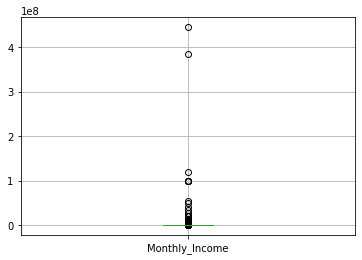

In [22]:
dataset.boxplot(column='Monthly_Income')
plt.show()

Widzimy wyraźnie, że zmienna boryka się z problemem wartości odstających. Ich redukcja zostanie uwzględniona w finalnym przygotowaniu danych.

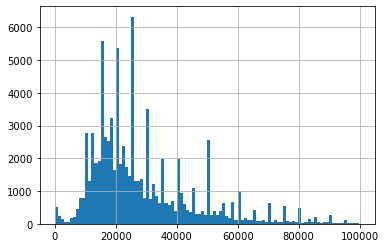

In [23]:
dataset['Monthly_Income'][dataset['Monthly_Income'] < 10e4].hist(bins=100)
plt.show()
# Występują obserwacje odstające, ponadto rozkład jest prawostronnie skośny, dlatego wykorzystamy przekształcenie logarytmiczne.

#### 5. Zmienna DOB 
#### 6. Zmienna Lead_Creation_Date

Tworzymy zmienną Age jako różnicę między zmiennymi Lead_Creation_Date oraz DOB.

In [24]:
dataset['LCD_DATE']=dataset['Lead_Creation_Date'].apply(lambda date: datetime.strptime(date, '%d-%b-%y'))
dataset['DOB_DATE']=dataset['DOB'].apply(lambda date: datetime.strptime(date, '%d-%b-%y'))
dataset['Age']=round((dataset['LCD_DATE']-dataset['DOB_DATE']).astype('timedelta64[M]')/12,2)
dataset['Age']=dataset['Age'].apply(lambda wiek: (wiek+100) if wiek <=0 else wiek)
columns_to_drop = ['Lead_Creation_Date','DOB','DOB_DATE','LCD_DATE']

Sprawdzamy daty urodzenia

In [25]:
dataset['YY']=dataset['DOB'].apply(lambda date: int(date[-2:]))
dataset['YY'].unique()

array([78, 85, 81, 87, 84, 82, 75, 72, 89, 76, 90, 83, 73, 91, 94, 88, 79,
       64, 92, 80, 95, 74, 86, 50, 77, 70, 68, 59, 93, 71, 96, 66, 61, 58,
       65, 63, 60, 62, 67, 69, 56, 55, 52, 54, 97, 57, 53, 51, 48, 42, 15,
       41, 49, 32, 47, 46, 43, 38, 29, 45, 36], dtype=int64)

Wniosek: Wszystkie daty poza 15 wyglądają jak z lat 1900-2000.

Sprawdźmy zatem co kryje się pod datami z roku 15?

In [26]:
dataset[dataset['YY']<=15]

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Device_Type,Var2,Source,Var4,Disbursed,State,LCD_DATE,DOB_DATE,Age,YY
60139,ID086286S10,Male,BENGALURU,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,5,2015-07-06,2015-07-06,100.0,15
60141,ID086288U30,Male,HYDERABAD,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,4,2015-07-06,2015-07-06,100.0,15
60496,ID086805R00,Male,AHMEDABAD,8333,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,4,2015-07-06,2015-07-06,100.0,15
60498,ID086807T20,Male,LUCKNOW,0,06-Jul-15,06-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,4,2015-07-06,2015-07-06,100.0,15
64278,ID092223B30,Male,BENGALURU,0,10-Jul-15,10-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,5,2015-07-10,2015-07-10,100.0,15
70130,ID100669X40,Female,NOTGIVEN,24000,20-Jun-15,17-Jul-15,100000.0,0.0,8.0,0,...,Web-browser,G,S122,7,0,1,2015-07-17,2015-06-20,100.0,15
74092,ID106332S20,Male,NOIDA,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,4,2015-07-21,2015-07-21,100.0,15
74093,ID106334U40,Male,DELHI,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,6,2015-07-21,2015-07-21,100.0,15
74094,ID106335V00,Male,DELHI,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,6,2015-07-21,2015-07-21,100.0,15
74095,ID106337X20,Male,HYDERABAD,0,21-Jul-15,21-Jul-15,0.0,0.0,0.0,0,...,Web-browser,G,S122,0,0,4,2015-07-21,2015-07-21,100.0,15


Wniosek w 16stu przypadkach data urodzenia = data utworzenia wniosku -> Takie rekordy trzeba będzie oczyścić uzupełniając np średnią/medianą wieku.

In [27]:
dataset[(dataset['YY']==15) & (dataset['DOB_DATE'] < dataset['LCD_DATE'])]

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Device_Type,Var2,Source,Var4,Disbursed,State,LCD_DATE,DOB_DATE,Age,YY
70130,ID100669X40,Female,NOTGIVEN,24000,20-Jun-15,17-Jul-15,100000.0,0.0,8.0,0,...,Web-browser,G,S122,7,0,1,2015-07-17,2015-06-20,100.0,15


In [28]:
idx = dataset[dataset['Age']>90].index 

In [29]:
idx

Int64Index([60139, 60141, 60496, 60498, 64278, 70130, 74092, 74093, 74094,
            74095, 74096, 74097, 74099, 74101, 74102, 74103, 74104],
           dtype='int64')

Oprócz wcześniej wskazanych przypadków ma więcej obserwacji osób po 90 - wszystkie wartości Age = 100 prawdopodobnie są błędami w danych -> do uzupełnienia.

In [30]:
columns_to_drop.extend(['YY','ID'])

<AxesSubplot:>

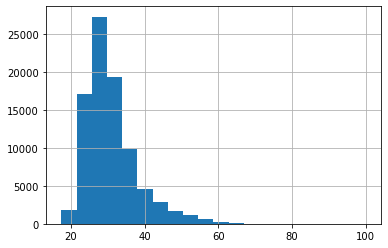

In [31]:
dataset['Age'].hist(bins=20)

Rozkład jest skośny, więc braki uzupełnimy medianą, na późniejszym etapie.

#### Tworzymy zmienną określającą miesiąc złożenia wniosku oraz dzień tygodnia. Może znajdziemy jakąś zależność związaną np. z systemem zmianowym pracowników.

In [32]:
dataset['LCD_month'] = dataset['LCD_DATE'].dt.month

In [33]:
dataset['LCD_month'].value_counts() # Zostawię to jako kolejną zmienną - kategoryczną i zobaczymy, czy da to jakiś ciekawy efekt

7    32996
6    27063
5    26961
Name: LCD_month, dtype: int64

In [34]:
dataset['LCD_dayofweek'] = dataset['LCD_DATE'].dt.dayofweek

In [35]:
dataset['LCD_YYYY'] = dataset['LCD_DATE'].dt.year

In [36]:
dataset['LCD_YYYY'].value_counts() # Wszystkie wnioski pochodzą z roku 2015 więc ta zmienna nic nie wniesie

2015    87020
Name: LCD_YYYY, dtype: int64

In [37]:
columns_to_drop.extend(['LCD_YYYY'])

#### 7. Loan_Amount_Applied

W zmiennej występuje 71 braków, które będą musiały zostać uzupełnione.

In [38]:
round(dataset['Loan_Amount_Applied'].describe(), 1)

count       86949.0
mean       230250.7
std        354206.8
min             0.0
25%             0.0
50%        100000.0
75%        300000.0
max      10000000.0
Name: Loan_Amount_Applied, dtype: float64

In [39]:
dataset['Loan_Amount_Applied'].quantile(0.95)

1000000.0

<AxesSubplot:>

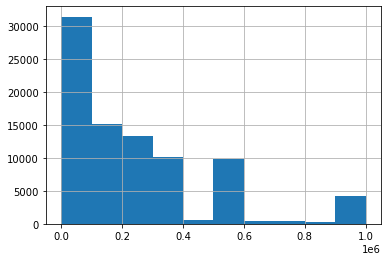

In [40]:
dataset[dataset['Loan_Amount_Applied'] <= 1000000]['Loan_Amount_Applied'].hist(bins = 10)

In [41]:
dataset[dataset['Loan_Amount_Applied'] == 0.0]['Disbursed'].sum()

277

In [42]:
dataset['Missing_Loan_Amount_Applied'] = (dataset['Loan_Amount_Applied'].isna() | (dataset['Loan_Amount_Applied'] == 0.0)).astype(int) #Dodaję zmienną określającą brak wartości

In [43]:
dataset['Missing_Loan_Amount_Applied'].value_counts()

0    58096
1    28924
Name: Missing_Loan_Amount_Applied, dtype: int64

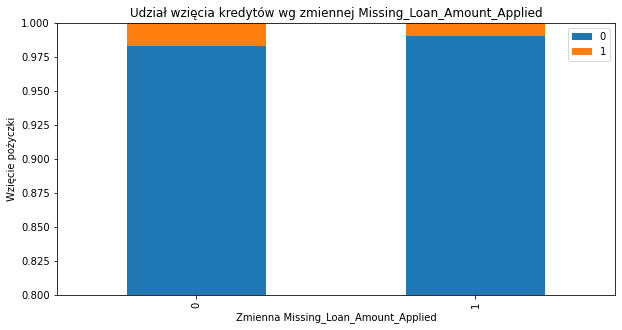

In [44]:
table = pd.crosstab(dataset['Missing_Loan_Amount_Applied'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Missing_Loan_Amount_Applied')
plt.xlabel('Zmienna Missing_Loan_Amount_Applied')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show() # Widzimy, że w przypadku braku wypełnienia tej zmiennej lub wypełnienia 0 klienci rzadziej decydują się na pożyczkę

Widzimy, że w przypadku braku wypełnienia tej zmiennej lub wypełnienia 0 klienci rzadziej decydują się na pożyczkę.

#### 8. Loan_Tenure_Applied 

W zmiennej występuje 71 braków, które będą musiały zostać uzupełnione.

In [45]:
dataset['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [46]:
dataset['Missing_Loan_Tenure_Applied'] = (dataset['Loan_Tenure_Applied'].isna() | (dataset['Loan_Tenure_Applied'] == 0.0)).astype(int)

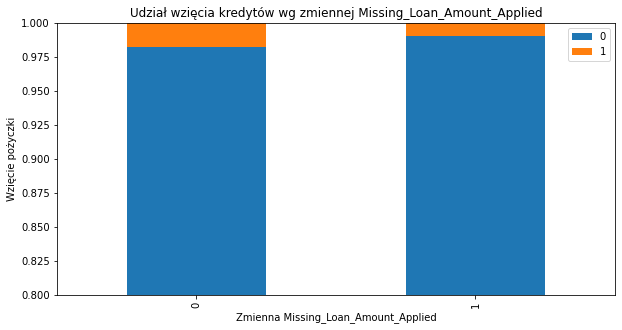

In [47]:
table = pd.crosstab(dataset['Missing_Loan_Tenure_Applied'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Missing_Loan_Amount_Applied')
plt.xlabel('Zmienna Missing_Loan_Amount_Applied')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show() # Widzimy, że w przypadku braku wypełnienia tej zmiennej lub wypełnienia 0 klienci rzadziej decydują się na pożyczkę

#### 9. Existing_EMI

W zmiennej występuje 71 braków, które będą musiały zostać uzupełnione.

In [48]:
dataset['Existing_EMI_gt0'] = (dataset['Existing_EMI'].isna() | dataset['Existing_EMI']  > 0).astype(int)

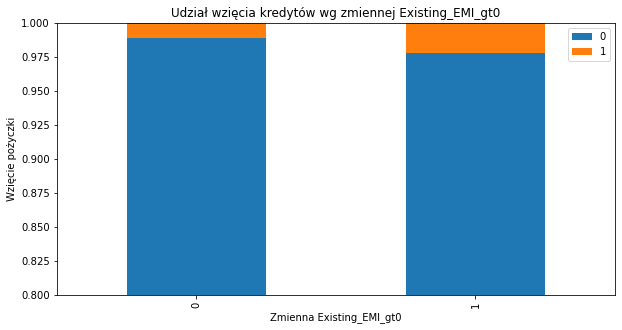

In [49]:
table = pd.crosstab(dataset['Existing_EMI_gt0'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Existing_EMI_gt0')
plt.xlabel('Zmienna Existing_EMI_gt0')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()

In [50]:
round(dataset['Existing_EMI'].describe(),1)

count       86949.0
mean         3696.2
std         39810.2
min             0.0
25%             0.0
50%             0.0
75%          3500.0
max      10000000.0
Name: Existing_EMI, dtype: float64

<AxesSubplot:>

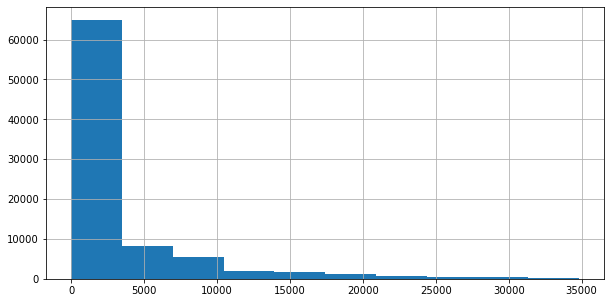

In [51]:
dataset[dataset['Existing_EMI']<35000]['Existing_EMI'].hist()

#### 10. Employer_Name

W zmiennej występuje 71 braków, które będą musiały zostać uzupełnione. Zastąpimy je wartością NotGiven.

In [52]:
dataset.loc[dataset['Employer_Name'].isna(), 'Employer_Name'] = 'NotGiven'

Nie usuwam wartości 0, gdyżmoże ona oznaczać coś istotnego - np. brak pracodawcy

In [53]:
dataset['Employer_Name'].value_counts()[:50] # Granica - 100 osób + kategoria Other
# len(dataset['Employer_Name'].unique())

0                                                    4914
TATA CONSULTANCY SERVICES LTD (TCS)                   550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD          404
ACCENTURE SERVICES PVT LTD                            324
GOOGLE                                                301
HCL TECHNOLOGIES LTD                                  250
ICICI BANK LTD                                        239
INDIAN AIR FORCE                                      191
INFOSYS TECHNOLOGIES                                  181
GENPACT                                               179
IBM CORPORATION                                       173
INDIAN ARMY                                           171
TYPE SLOWLY FOR AUTO FILL                             162
WIPRO TECHNOLOGIES                                    155
HDFC BANK LTD                                         148
IKYA HUMAN CAPITAL SOLUTIONS LTD                      142
STATE GOVERNMENT                                      134
INDIAN RAILWAY

In [54]:
frequent_employers = dataset['Employer_Name'].value_counts()[dataset['Employer_Name'].value_counts() > 50].index.tolist()
frequent_employers

['0',
 'TATA CONSULTANCY SERVICES LTD (TCS)',
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
 'ACCENTURE SERVICES PVT LTD',
 'GOOGLE',
 'HCL TECHNOLOGIES LTD',
 'ICICI BANK LTD',
 'INDIAN AIR FORCE',
 'INFOSYS TECHNOLOGIES',
 'GENPACT',
 'IBM CORPORATION',
 'INDIAN ARMY',
 'TYPE SLOWLY FOR AUTO FILL',
 'WIPRO TECHNOLOGIES',
 'HDFC BANK LTD',
 'IKYA HUMAN CAPITAL SOLUTIONS LTD',
 'STATE GOVERNMENT',
 'INDIAN RAILWAY',
 'INDIAN NAVY',
 'ARMY',
 'WIPRO BPO',
 'OTHERS',
 'TECH MAHINDRA LTD',
 'CONVERGYS INDIA SERVICES PVT LTD',
 'SERCO BPO PVT LTD',
 'IBM GLOBAL SERVICES INDIA LTD',
 'CONCENTRIX DAKSH SERVICES INDIA PVT LTD',
 'RANDSTAD INDIA LTD',
 'CAPGEMINI INDIA PVT LTD',
 'ADECCO INDIA PVT LTD',
 'WNS GLOBAL SERVICES PVT LTD',
 'CIPLA LTD',
 'SUTHERLAND GLOBAL SERVICES PVT LTD',
 'TCS ESERVE LTD (TATA CONSULTANCY SERVICES BPO)',
 'INDUSIND BANK LTD',
 'HEWLETT PACKARD GLOBALSOFT PVT LTD',
 'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD',
 'WIPRO INFOTECH',
 'KOTAK MAHINDRA BANK LTD'

In [55]:
def convert_employer(emp):
    if emp in frequent_employers:
        return emp
    else:
        return "Other"

dataset['Employer_Name'] = dataset['Employer_Name'].apply(convert_employer)

In [56]:
dataset['Employer_Name'].value_counts()

Other                                           74304
0                                                4914
TATA CONSULTANCY SERVICES LTD (TCS)               550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      404
ACCENTURE SERVICES PVT LTD                        324
                                                ...  
RAILWAY                                            55
IBM BUSINESS CONSULTING SERVICES                   55
TEACHERS                                           54
AMERICAN EXPRESS INDIA LTD                         53
TECH MAHINDRA BUSINESS SERVICES LTD                53
Name: Employer_Name, Length: 71, dtype: int64

In [57]:
employer_means = dataset.groupby('Employer_Name')['Disbursed'].mean()
employer_means

Employer_Name
0                              0.001018
ACCENTURE SERVICES PVT LTD     0.037037
ADECCO INDIA PVT LTD           0.021053
AEGIS BPO SERVICES PVT LTD     0.000000
AMERICAN EXPRESS INDIA LTD     0.056604
                                 ...   
TYPE SLOWLY FOR AUTO FILL      0.024691
WIPRO BPO                      0.008621
WIPRO INFOTECH                 0.000000
WIPRO TECHNOLOGIES             0.006452
WNS GLOBAL SERVICES PVT LTD    0.011111
Name: Disbursed, Length: 71, dtype: float64

In [58]:
employer_mapping_dict = dict(pd.cut(employer_means[(employer_means.index != '0') & (employer_means.index != 'Other')], 
                                    bins=10, 
                                    labels=range(1, 11)))
employer_mapping_dict

{'ACCENTURE SERVICES PVT LTD': 6,
 'ADECCO INDIA PVT LTD': 3,
 'AEGIS BPO SERVICES PVT LTD': 1,
 'AMERICAN EXPRESS INDIA LTD': 8,
 'ANI TECHNOLOGIES PVT LTD': 1,
 'ARMY': 1,
 'BSNL': 10,
 'CAPGEMINI CONSULTING INDIA PVT LTD': 5,
 'CAPGEMINI INDIA PVT LTD': 6,
 'CIPLA LTD': 8,
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD': 4,
 'CONCENTRIX DAKSH SERVICES INDIA PVT LTD': 3,
 'CONVERGYS INDIA SERVICES PVT LTD': 1,
 'CRPF': 1,
 'DELL INTERNATIONAL SERVICES INDIA PRIVATE LIMITED': 5,
 'DR REDDYS LABORATORIES LTD': 10,
 'EDUCATION DEPARTMENT': 5,
 'ERICSSON INDIA GLOBAL SERVICES PVT LTD': 9,
 'GENPACT': 6,
 'GOOGLE': 1,
 'GOVERNMENT OF INDIA': 1,
 'HCL TECHNOLOGIES LTD': 4,
 'HDFC BANK LTD': 3,
 'HEWLETT PACKARD GLOBALSOFT PVT LTD': 4,
 'HONDA CARS INDIA LTD': 1,
 'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD': 8,
 'IBM BUSINESS CONSULTING SERVICES': 3,
 'IBM CORPORATION': 4,
 'IBM DAKSH': 1,
 'IBM GLOBAL SERVICES INDIA LTD': 7,
 'ICICI BANK LTD': 1,
 'IKYA HUMAN CAPITAL SOLUTIONS LTD': 3,

In [59]:
dataset['Employer_Name'] = dataset['Employer_Name'].replace(employer_mapping_dict)

In [60]:
Dr=pd.DataFrame(round(100*dataset.groupby('Employer_Name')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('Employer_Name')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('Employer_Name')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

               dis_rate  no_obs  share
Employer_Name                         
1                  0.09    2170   2.49
0                  0.10    4914   5.65
2                  1.09     921   1.06
Other              1.48   74304  85.39
3                  1.88     904   1.04
4                  2.56    1408   1.62
5                  3.28     183   0.21
6                  3.86    1374   1.58
7                  4.79     167   0.19
8                  5.39     427   0.49
9                  6.15      65   0.07
10                 7.10     183   0.21


Widać możliwości ewentualnej poprawy i redukcji klas, jednkaże na ten moment zostawię 12 klas, żeby nie tracić zbyt dużo informacji.

#### 11. Salary_Account

W zmiennej występuje 11764 braków - wypełnimy je nową kategorią NotGiven.

In [62]:
dataset['Salary_Account'].isna().sum()

11764

In [63]:
dataset.loc[dataset['Salary_Account'].isna(), 'Salary_Account'] = 'NotGiven'

In [64]:
frequent_Salary_Account = dataset['Salary_Account'].value_counts()[dataset['Salary_Account'].value_counts() > 100].index.tolist()
frequent_Salary_Account

['HDFC Bank',
 'ICICI Bank',
 'State Bank of India',
 'NotGiven',
 'Axis Bank',
 'Citibank',
 'Kotak Bank',
 'IDBI Bank',
 'Punjab National Bank',
 'Bank of India',
 'Bank of Baroda',
 'Standard Chartered Bank',
 'Canara Bank',
 'Union Bank of India',
 'Yes Bank',
 'ING Vysya',
 'Corporation bank',
 'Indian Overseas Bank',
 'State Bank of Hyderabad',
 'Indian Bank',
 'Oriental Bank of Commerce',
 'IndusInd Bank',
 'Andhra Bank',
 'Central Bank of India',
 'Syndicate Bank',
 'Bank of Maharasthra',
 'State Bank of Bikaner & Jaipur',
 'HSBC',
 'Karur Vysya Bank',
 'State Bank of Mysore',
 'Federal Bank',
 'Vijaya Bank',
 'Allahabad Bank',
 'UCO Bank',
 'State Bank of Travancore',
 'Karnataka Bank',
 'Saraswat Bank',
 'United Bank of India',
 'Dena Bank',
 'State Bank of Patiala',
 'South Indian Bank',
 'Deutsche Bank',
 'Abhyuday Co-op Bank Ltd']

In [67]:
account_means = dataset.groupby('Salary_Account')['Disbursed'].mean()
account_means

Salary_Account
Abhyuday Co-op Bank Ltd                            0.009259
Allahabad Bank                                     0.012605
Andhra Bank                                        0.006186
Axis Bank                                          0.016737
B N P Paribas                                      0.000000
Bank of Baroda                                     0.006217
Bank of India                                      0.004274
Bank of Maharasthra                                0.007389
Bank of Rajasthan                                  0.000000
Canara Bank                                        0.007071
Catholic Syrian Bank                               0.071429
Central Bank of India                              0.015730
Citibank                                           0.028199
Corporation bank                                   0.015408
Dena Bank                                          0.000000
Deutsche Bank                                      0.040000
Dhanalakshmi Bank Ltd    

In [68]:
account_mapping_dict = dict(pd.cut(account_means[(account_means.index != 'NotGiven')], 
                                    bins=2, 
                                    labels=range(1, 3)))
account_mapping_dict

{'Abhyuday Co-op Bank Ltd': 1,
 'Allahabad Bank': 1,
 'Andhra Bank': 1,
 'Axis Bank': 1,
 'B N P Paribas': 1,
 'Bank of Baroda': 1,
 'Bank of India': 1,
 'Bank of Maharasthra': 1,
 'Bank of Rajasthan': 1,
 'Canara Bank': 1,
 'Catholic Syrian Bank': 2,
 'Central Bank of India': 1,
 'Citibank': 1,
 'Corporation bank': 1,
 'Dena Bank': 1,
 'Deutsche Bank': 2,
 'Dhanalakshmi Bank Ltd': 1,
 'Federal Bank': 1,
 'Firstrand Bank Limited': 1,
 'GIC Housing Finance Ltd': 1,
 'HDFC Bank': 1,
 'HSBC': 2,
 'ICICI Bank': 1,
 'IDBI Bank': 1,
 'ING Vysya': 1,
 'India Bulls': 1,
 'Indian Bank': 1,
 'Indian Overseas Bank': 1,
 'IndusInd Bank': 1,
 'Industrial And Commercial Bank Of China Limited': 1,
 'J&K Bank': 1,
 'Karnataka Bank': 1,
 'Karur Vysya Bank': 1,
 'Kerala Gramin Bank': 1,
 'Kotak Bank': 1,
 'Lakshmi Vilas bank': 1,
 'Oriental Bank of Commerce': 1,
 'Punjab & Sind bank': 1,
 'Punjab National Bank': 1,
 'Saraswat Bank': 1,
 'South Indian Bank': 1,
 'Standard Chartered Bank': 1,
 'State Bank

In [69]:
dataset['Salary_Account'] = dataset['Salary_Account'].replace(account_mapping_dict)

In [70]:
Dr=pd.DataFrame(round(100*dataset.groupby('Salary_Account')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('Salary_Account')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('Salary_Account')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

                dis_rate  no_obs  share
Salary_Account                         
NotGiven            0.20   11764  13.52
1                   1.64   74706  85.85
2                   4.00     550   0.63


#### 12. Mobile_Verified (object) - zmienna kategoryczna (binarna)

 Wszystkie wartości wypełnione.

In [71]:
dataset['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

#### 13. Var5 (int64) - zmienna ciągła

Wszystkie wartości wypełnione.

In [72]:
dataset['Var5'].value_counts()

0     29087
1     12236
3      6759
11     5204
2      4485
14     3662
15     3509
12     2989
13     2622
8      2515
10     2427
9      2281
16     2097
4      1815
17     1691
7      1489
6       983
5       975
18      194
Name: Var5, dtype: int64

<AxesSubplot:>

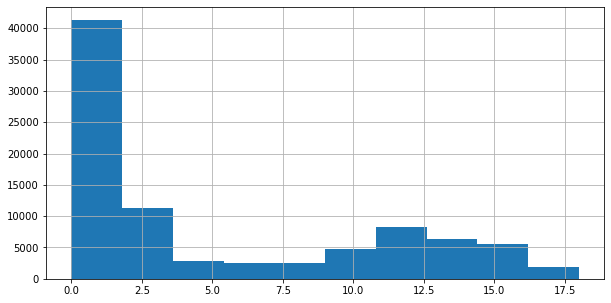

In [73]:
dataset['Var5'].hist()

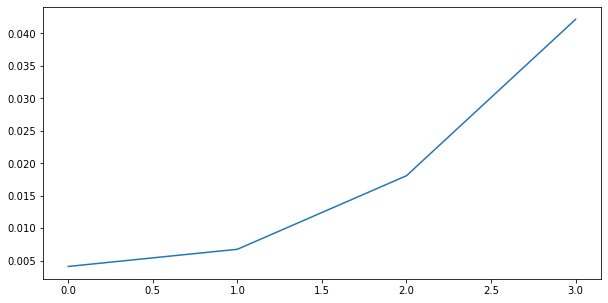

In [74]:
y_train_group=dataset['Disbursed'].copy()
y_train_group=pd.DataFrame(y_train_group)

y_train_group['Var5']=pd.qcut(dataset['Var5'], 5, labels=False,duplicates='drop')
plt.plot(y_train_group.groupby(['Var5'])['Disbursed'].mean())
plt.show() # Wniosek - stymulanta

In [75]:
Dr=pd.DataFrame(round(100*dataset.groupby('Var5')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('Var5')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('Var5')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

      dis_rate  no_obs  share
Var5                         
1         0.16   12236  14.06
2         0.51    4485   5.15
0         0.52   29087  33.43
3         0.78    6759   7.77
4         0.88    1815   2.09
11        1.54    5204   5.98
8         1.59    2515   2.89
6         1.83     983   1.13
5         2.26     975   1.12
9         2.28    2281   2.62
10        2.31    2427   2.79
7         2.42    1489   1.71
12        3.04    2989   3.43
14        3.82    3662   4.21
13        4.20    2622   3.01
16        4.63    2097   2.41
18        4.64     194   0.22
15        4.93    3509   4.03
17        5.14    1691   1.94


Dodajemy zmienną Var5_gt4 ponieważ poniżej 4 udział Disbursed jest dużo niższy niż w reszcie.

In [76]:
dataset['Var5_gt4'] = (dataset['Var5'] > 4).astype(int)

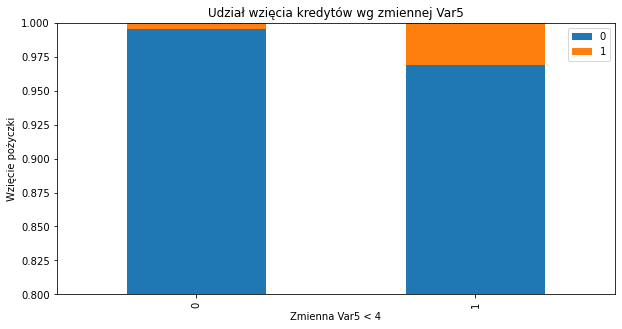

In [77]:
table = pd.crosstab(dataset['Var5_gt4'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Var5')
plt.xlabel('Zmienna Var5 < 4')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()

#### 14. Var1 (object) - zmienna kategoryczna

Nie ma braków, które musielibyśmy uzupełnić - możemy wziąć "czystą" zmienną 

In [78]:
dataset['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [79]:
Var1_means = dataset.groupby('Var1')['Disbursed'].mean()
Var1_means

Var1
HAVC    0.020833
HAXA    0.023032
HAXB    0.055694
HAXC    0.056641
HAXF    0.000000
HAXM    0.037313
HAYT    0.013780
HAZD    0.018349
HBXA    0.045690
HBXB    0.003349
HBXC    0.010211
HBXD    0.029532
HBXH    0.012371
HBXX    0.011502
HCXD    0.008439
HCXF    0.027701
HCXG    0.000000
HCYS    0.009217
HVYS    0.000000
Name: Disbursed, dtype: float64

#### 15. Loan_Amount_Submitted (float64) - zmienna ciągła

W zmiennej występuje 34613 braków. Dorzucimy zmienną 0-1 oznaczającą wypełnienie pola. 

In [80]:
dataset['Missing_Loan_Amount_Submitted'] = dataset['Loan_Amount_Submitted'].isna().astype(int)

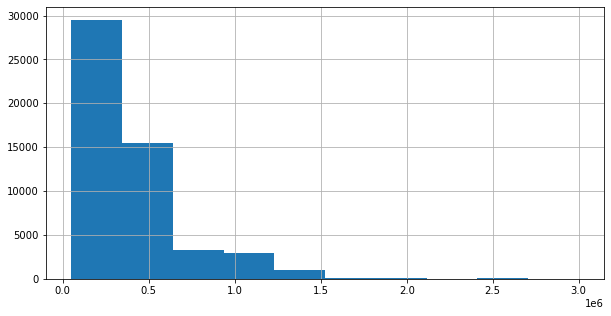

In [81]:
dataset['Loan_Amount_Submitted'].hist()
plt.show()

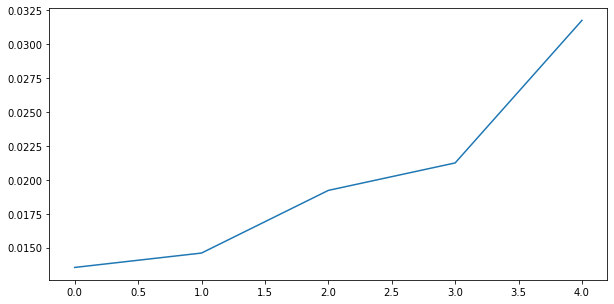

In [82]:
y_train_group=dataset['Disbursed'].copy()
y_train_group=pd.DataFrame(y_train_group)

y_train_group['Loan_Amount_Submitted']=pd.qcut(dataset['Loan_Amount_Submitted'], 5, labels=False,duplicates='drop')
plt.plot(y_train_group.groupby(['Loan_Amount_Submitted'])['Disbursed'].mean())
plt.show() # Wniosek - stymulanta

#### 16. Loan_Tenure_Submitted (float64) - zmienna dyskretna (chyba)

W zmiennej występuje 34613 braków. Dorzucimy zmienną 0-1 oznaczającą wypełnienie pola. 

In [83]:
dataset['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

In [84]:
dataset['Missing_Loan_Tenure_Submitted'] = dataset['Loan_Tenure_Submitted'].isna().astype(int)

#### 17. Interest_Rate

W zmiennej występuje 59294 braków. Dorzucimy zmienną 0-1 oznaczającą wypełnienie pola. 

In [85]:
dataset['Missing_Interest_Rate'] = dataset['Interest_Rate'].isna().astype(int)

#### 18. Processing_Fee

W zmiennej występuje 59294 braków. Dorzucimy zmienną 0-1 oznaczającą wypełnienie pola. 

In [86]:
dataset['Missing_Processing_Fee'] = dataset['Processing_Fee'].isna().astype(int)

#### 19. EMI_Loan_Submitted

W zmiennej występuje 59294 braków. Dorzucimy zmienną 0-1 oznaczającą wypełnienie pola. 

In [87]:
dataset['EMI_Loan_Submitted'] = dataset['EMI_Loan_Submitted'].isna().astype(int)

#### 20. Filled_Form

W zmiennej nie występują braki.

In [88]:
dataset['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

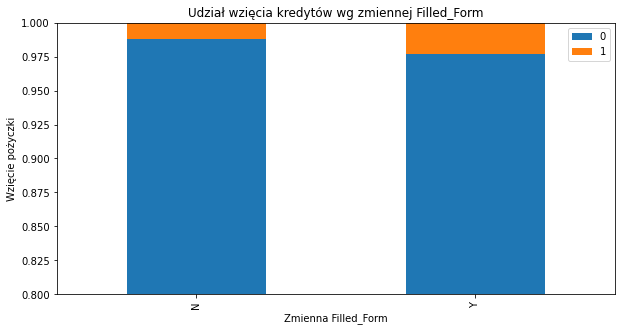

In [89]:
table = pd.crosstab(dataset['Filled_Form'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Filled_Form')
plt.xlabel('Zmienna Filled_Form')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()

#### 21. Device_Type (object) - zmienna kategoryczna

W zmiennej nie występują braki.

In [90]:
dataset['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

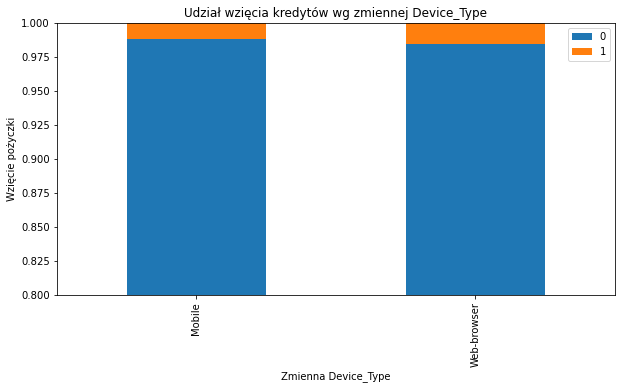

In [91]:
table = pd.crosstab(dataset['Device_Type'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Device_Type')
plt.xlabel('Zmienna Device_Type')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()

#### 22. Var2 (object) - zmienna kategoryczna

W zmiennej nie występują braki.

In [92]:
dataset['Var2'].value_counts() # Możemy połączyć mniej liczne kategorie

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [93]:
Dr=pd.DataFrame(round(100*dataset.groupby('Var2')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('Var2')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('Var2')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

      dis_rate  no_obs  share
Var2                         
A         0.00       5   0.01
D         0.00     634   0.73
F         1.10     544   0.63
C         1.24   14210  16.33
G         1.34   33032  37.96
E         1.60    1315   1.51
B         1.68   37280  42.84


Na podstawie tabelki połączymy A z D

In [94]:
dataset.loc[dataset['Var2'].isin(['A','D']),'Var2'] = 'A/D'

#### 23. Source (object) - zmienna kategoryczna

W zmiennej nie występują braki.

In [95]:
dataset['Source'].value_counts() # Połączyć mniej liczne kategorie

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S136        3
S129        3
S139        3
S138        3
S135        2
S154        1
S140        1
S125        1
S130        1
Name: Source, dtype: int64

In [96]:
Dr=pd.DataFrame(round(100*dataset.groupby('Source')['Disbursed'].mean(),2))
Dr.columns=["dis_rate"]
#liczba obserwacji:
No=pd.DataFrame(dataset.groupby('Source')['Disbursed'].count())
No.columns=["no_obs"]
#udział procentowy danej wartości w liczbie obserwacji:
Share=pd.DataFrame(round(100*dataset.groupby('Source')['Disbursed'].count()/dataset['Disbursed'].count(),2))
Share.columns=["share"]
#połączenie tabel:
tabela=Dr.join(No)
tabela=tabela.join(Share)
tabela.sort_values(['dis_rate'], inplace=True)
print(tabela)

        dis_rate  no_obs  share
Source                         
S140        0.00       1   0.00
S156        0.00     308   0.35
S155        0.00       4   0.00
S154        0.00       1   0.00
S150        0.00      10   0.01
S139        0.00       3   0.00
S138        0.00       3   0.00
S136        0.00       3   0.00
S135        0.00       2   0.00
S162        0.00      36   0.04
S130        0.00       1   0.00
S129        0.00       3   0.00
S125        0.00       1   0.00
S124        0.00      24   0.03
S123        0.00      73   0.08
S137        0.06    1724   1.98
S153        0.20     494   0.57
S161        0.26     769   0.88
S158        0.48     208   0.24
S151        0.56     720   0.83
S157        0.62     650   0.75
S144        0.67     299   0.34
S127        0.73    1931   2.22
S159        0.77    5599   6.43
S122        1.49   38567  44.32
S133        1.63   29885  34.34
S141        1.75      57   0.07
S143        2.12    4332   4.98
S134        3.61    1301   1.50
S160    

Połączymy podobne kategorie.

In [97]:
dataset.loc[dataset['Source'].isin(['S140','S156','S155','S154','S150','S139','S138','S136','S135','S162','S130','S129','S125','S124','S123','S137']),'Source'] = 'S001'
dataset.loc[dataset['Source'].isin(['S134','S160']),'Source'] = 'S002'

#### 24. Var4 (int64) - zmienna kategoryczna

W zmiennej nie występują braki.

In [99]:
dataset['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

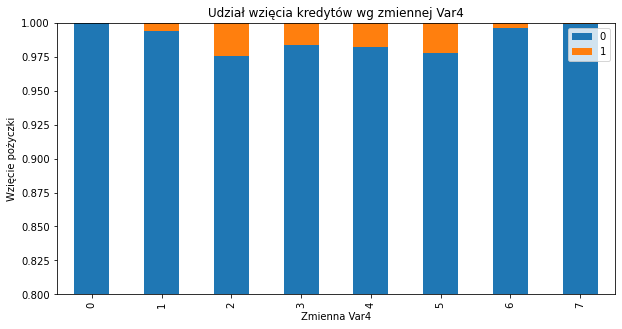

In [100]:
table = pd.crosstab(dataset['Var4'],dataset['Disbursed'])
plt.rcParams["figure.figsize"] = (10,5)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Udział wzięcia kredytów wg zmiennej Var4')
plt.xlabel('Zmienna Var4')
plt.ylabel('Wzięcie pożyczki')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show() # Wartości zmiennej Var4: 2,3,4,5 są bardziej ryzykowne

#### 25. Disbursed (int64) - zmienna celu

In [101]:
dataset['Disbursed'].isna().sum()

0

In [102]:
dataset['Disbursed'].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

In [103]:
dataset.drop(columns_to_drop, axis=1, inplace=True)

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         87020 non-null  object 
 1   City                           87020 non-null  object 
 2   Monthly_Income                 87020 non-null  int64  
 3   Loan_Amount_Applied            86949 non-null  float64
 4   Loan_Tenure_Applied            86949 non-null  float64
 5   Existing_EMI                   86949 non-null  float64
 6   Employer_Name                  87020 non-null  object 
 7   Salary_Account                 87020 non-null  object 
 8   Mobile_Verified                87020 non-null  object 
 9   Var5                           87020 non-null  int64  
 10  Var1                           87020 non-null  object 
 11  Loan_Amount_Submitted          52407 non-null  float64
 12  Loan_Tenure_Submitted          52407 non-null 

### Zbierzmy zatem wszystkie dokonane modyfikacje zbioru w jedno miejsce, aby ułatwić dalszą pracę nad projektem.

In [105]:
dataset = pd.read_csv('https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv',encoding="latin1")
dataset.drop('LoggedIn', axis=1, inplace=True)

In [106]:
def convert_var(var):
    if var in frequent_var:
        return var
    else:
        return "Other"

In [107]:
columns_to_drop = ['ID'] # Tworzę listę zmiennych do usunięcia z bazy

###############################################################################################################################
# City & State (Po przeanalizowaniu współczynnika IV wnioskuję, że większą informację niesie ze sobą zostawienie 
# 35 najczęściejwystępujących miast niż zamiana miast na stany i agregacja wyników. Zostawiam obie zmienne, ale city lepsza)
###############################################################################################################################
IndiaCitiesStates = pd.read_excel('Indie.xlsx',sheet_name=0)
IndiaCitiesStates.columns = ['City','State']
dataset['City'] = dataset['City'].str.upper()
dataset = pd.merge(dataset, IndiaCitiesStates, on='City', how='left')

dataset['State'].fillna('NotGiven', inplace=True) # Braki danych uzupełniamy kategorią NotGiven
dataset.loc[dataset['State'].isin(['TELANGANA','TRIPURA','MEGHALAYA','MANIPUR','ARUNACHAL PRADESH','SIKKIM','NAGALAND','MIZORAM','UTTARAKHAND']),'State'] = 'Other'

state_means = dataset.groupby('State')['Disbursed'].mean()
state_mapping_dict = dict(pd.cut(state_means[(state_means.index != '0')], bins=6, labels=range(1, 7)))
dataset['State'] = dataset['State'].replace(state_mapping_dict) # Grupuję stany

# Zamieniam miasta na 35 kategorii, pozostałe wrzucam do Other
dataset['City'].fillna('NotGiven', inplace=True)
frequent_var = dataset['City'].value_counts().index[:35].tolist()
dataset['City'] = dataset['City'].apply(convert_var)

###############################################################################################################################
# Dodanie zmiennej Age, LCD_month oraz LCD_dayofweek
###############################################################################################################################
dataset['LCD_DATE']=dataset['Lead_Creation_Date'].apply(lambda date: datetime.strptime(date, '%d-%b-%y'))
dataset['DOB_DATE']=dataset['DOB'].apply(lambda date: datetime.strptime(date, '%d-%b-%y'))
dataset['Age']=round((dataset['LCD_DATE']-dataset['DOB_DATE']).astype('timedelta64[M]')/12,2)
dataset['Age']=dataset['Age'].apply(lambda wiek: (wiek+100) if wiek <=0 else wiek)
dataset['LCD_month'] = dataset['LCD_DATE'].dt.month
dataset['LCD_dayofweek'] = dataset['LCD_DATE'].dt.dayofweek

columns_to_drop.extend(['Lead_Creation_Date','DOB','DOB_DATE','LCD_DATE'])

###############################################################################################################################
# Agregacja zmiennej Employer_Name
###############################################################################################################################
dataset.loc[dataset['Employer_Name'].isna(), 'Employer_Name'] = 'NotGiven'
frequent_var = dataset['Employer_Name'].value_counts()[dataset['Employer_Name'].value_counts() > 50].index.tolist()
dataset['Employer_Name'] = dataset['Employer_Name'].apply(convert_var)

employer_means = dataset.groupby('Employer_Name')['Disbursed'].mean()
employer_mapping_dict = dict(pd.cut(employer_means[(employer_means.index != '0') & (employer_means.index != 'Other')], 
                                    bins=10, 
                                    labels=range(1, 11)))

dataset['Employer_Name'] = dataset['Employer_Name'].replace(employer_mapping_dict)

###############################################################################################################################
# Agregacja zmiennej Salary_Account
###############################################################################################################################
dataset.loc[dataset['Salary_Account'].isna(), 'Salary_Account'] = 'NotGiven'
account_means = dataset.groupby('Salary_Account')['Disbursed'].mean()
account_mapping_dict = dict(pd.cut(account_means[(account_means.index != 'NotGiven')], 
                                    bins=2, 
                                    labels=range(1, 3)))
dataset['Salary_Account'] = dataset['Salary_Account'].replace(account_mapping_dict)

###############################################################################################################################
# Agregacja zmiennej Salary_Account
###############################################################################################################################

###############################################################################################################################
# Var2 - łączenie kategorii podobnych
###############################################################################################################################
dataset.loc[dataset['Var2'].isin(['A','D']),'Var2'] = 'A/D'

###############################################################################################################################
# Source - łączenie kategorii podobnych
###############################################################################################################################
dataset.loc[dataset['Source'].isin(['S140','S156','S155','S154','S150','S139','S138','S136','S135','S162','S130','S129','S125','S124','S123','S137']),'Source'] = 'S001'
dataset.loc[dataset['Source'].isin(['S134','S160']),'Source'] = 'S002'

###############################################################################################################################
# Dodanie zmiennych 0-1 określających brak uzupełnienia zmiennej lub konkretne wartości
###############################################################################################################################
dataset['Missing_Loan_Amount_Applied'] = (dataset['Loan_Amount_Applied'].isna() | (dataset['Loan_Amount_Applied'] == 0.0)).astype(int)
dataset['Missing_Loan_Tenure_Applied'] = (dataset['Loan_Tenure_Applied'].isna() | (dataset['Loan_Tenure_Applied'] == 0.0)).astype(int)
dataset['Missing_Loan_Amount_Submitted'] = dataset['Loan_Amount_Submitted'].isna().astype(int)
dataset['Missing_Loan_Tenure_Submitted'] = dataset['Loan_Tenure_Submitted'].isna().astype(int)
dataset['Missing_Interest_Rate'] = dataset['Interest_Rate'].isna().astype(int)
dataset['Missing_Processing_Fee'] = dataset['Processing_Fee'].isna().astype(int)
dataset['Missing_EMI_Loan_Submitted'] = dataset['EMI_Loan_Submitted'].isna().astype(int)
dataset['Var5_gt4'] = (dataset['Var5'] > 4).astype(int)
dataset['Existing_EMI_gt0'] = (dataset['Existing_EMI']  > 0).astype(int)

###############################################################################################################################

dataset.drop(columns_to_drop, axis=1, inplace=True)

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         87020 non-null  object 
 1   City                           87020 non-null  object 
 2   Monthly_Income                 87020 non-null  int64  
 3   Loan_Amount_Applied            86949 non-null  float64
 4   Loan_Tenure_Applied            86949 non-null  float64
 5   Existing_EMI                   86949 non-null  float64
 6   Employer_Name                  87020 non-null  object 
 7   Salary_Account                 87020 non-null  object 
 8   Mobile_Verified                87020 non-null  object 
 9   Var5                           87020 non-null  int64  
 10  Var1                           87020 non-null  object 
 11  Loan_Amount_Submitted          52407 non-null  float64
 12  Loan_Tenure_Submitted          52407 non-null 

In [109]:
# Zamieniam typ zmiennej Var4 na str, aby dobrze zakwalifikować zmienne

dataset['Missing_Loan_Amount_Applied']=dataset['Missing_Loan_Amount_Applied'].astype('str')
dataset['Missing_Loan_Tenure_Applied']=dataset['Missing_Loan_Tenure_Applied'].astype('str')
dataset['Missing_Loan_Amount_Submitted']=dataset['Missing_Loan_Amount_Submitted'].astype('str')
dataset['Missing_Loan_Tenure_Submitted']=dataset['Missing_Loan_Tenure_Submitted'].astype('str')
dataset['Missing_Interest_Rate']=dataset['Missing_Interest_Rate'].astype('str')
dataset['Missing_Processing_Fee']=dataset['Missing_Processing_Fee'].astype('str')
dataset['Missing_EMI_Loan_Submitted']=dataset['Missing_EMI_Loan_Submitted'].astype('str')
dataset['Var5_gt4']=dataset['Var5_gt4'].astype('str')
dataset['Existing_EMI_gt0']=dataset['Existing_EMI_gt0'].astype('str')
dataset['State']=dataset['State'].astype('str')
dataset['LCD_dayofweek']=dataset['LCD_dayofweek'].astype('str')
dataset['Var5']=dataset['Var5'].astype('float64')
dataset['Var4'] = dataset['Var4'].astype('str')
dataset['LCD_month']=dataset['LCD_month'].astype('str')

Napiszemy klasę, która dzieli nam zbiór na podzbiory wg typu zmiennej.

In [110]:
class ColumnSelectorByType():
    def __init__(self,typ):
        self.typ=typ
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        return X.select_dtypes(self.typ)

Wyodrębniamy zmienne kategoryczne.

In [111]:
cs_char = ColumnSelectorByType([np.object])

daneChar = cs_char.transform(dataset)
daneChar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         87020 non-null  object
 1   City                           87020 non-null  object
 2   Employer_Name                  87020 non-null  object
 3   Salary_Account                 87020 non-null  object
 4   Mobile_Verified                87020 non-null  object
 5   Var1                           87020 non-null  object
 6   Filled_Form                    87020 non-null  object
 7   Device_Type                    87020 non-null  object
 8   Var2                           87020 non-null  object
 9   Source                         87020 non-null  object
 10  Var4                           87020 non-null  object
 11  State                          87020 non-null  object
 12  LCD_month                      87020 non-null  object
 13  L

Wyodrębniamy zmienne numeryczne.

In [112]:
cs_num = ColumnSelectorByType([np.float64])

daneNum = cs_num.transform(dataset)
daneNum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87020 entries, 0 to 87019
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_Amount_Applied    86949 non-null  float64
 1   Loan_Tenure_Applied    86949 non-null  float64
 2   Existing_EMI           86949 non-null  float64
 3   Var5                   87020 non-null  float64
 4   Loan_Amount_Submitted  52407 non-null  float64
 5   Loan_Tenure_Submitted  52407 non-null  float64
 6   Interest_Rate          27726 non-null  float64
 7   Processing_Fee         27420 non-null  float64
 8   EMI_Loan_Submitted     27726 non-null  float64
 9   Age                    87020 non-null  float64
dtypes: float64(10)
memory usage: 7.3 MB


Przyjrzyjmy się rozkładom zmiennych ciągłych.

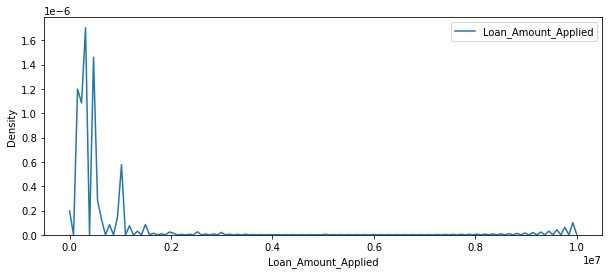

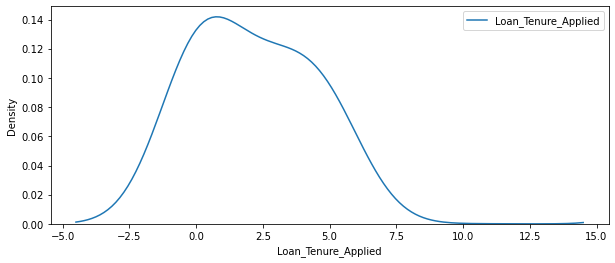

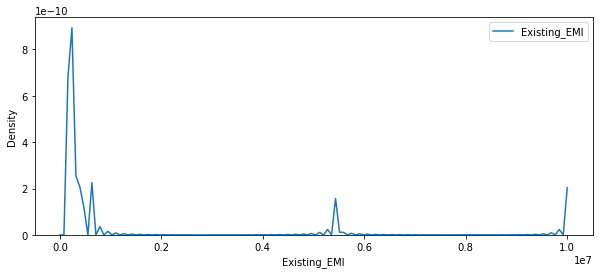

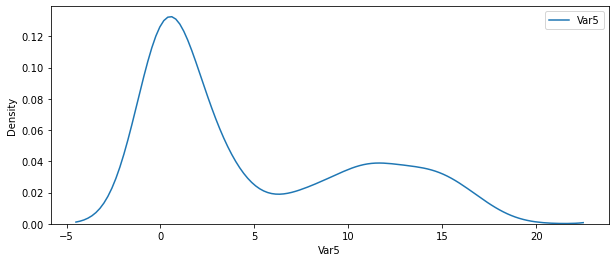

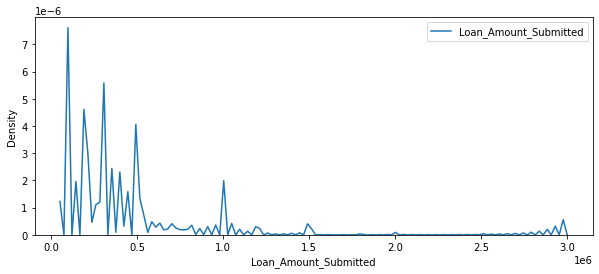

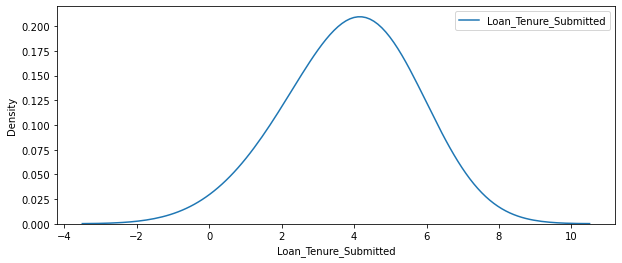

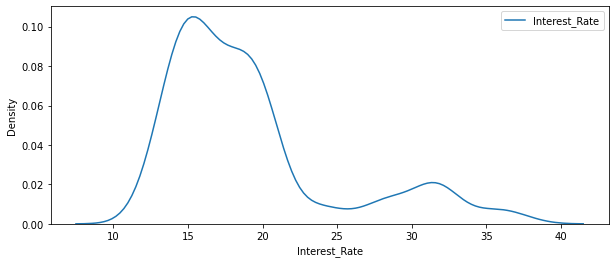

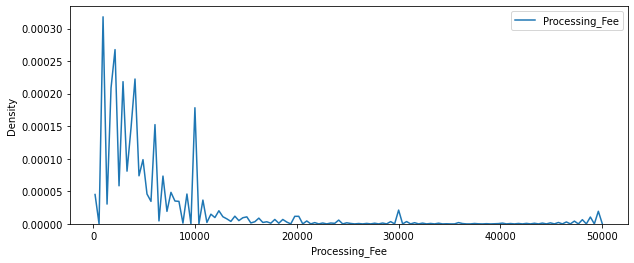

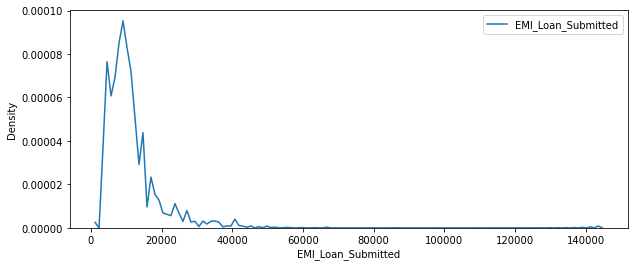

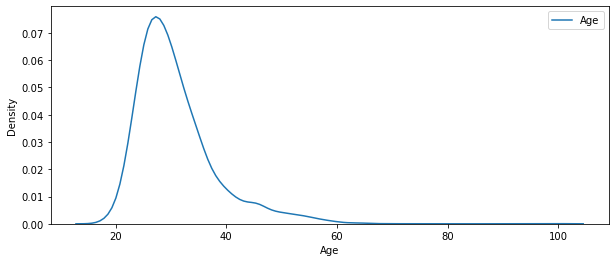

In [113]:
plt.rcParams["figure.figsize"]=(10,4)

def PlotBySample(X1):
    for var in X1.columns:
        sns.distplot(X1[var],hist = False, label= var, kde_kws = {'bw' : 1.5})
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.show()
        
PlotBySample(daneNum)

Zastosujemy logarytm, aby poprawić zmienne charakteryzujące się skośnym rozkładem.

In [114]:
dataset['Interest_Rate'] = np.log10(dataset['Interest_Rate'] + 1)
dataset['Loan_Tenure_Applied'] = np.log10(dataset['Loan_Tenure_Applied'] + 1)
dataset['Var5'] = np.log10(dataset['Var5'] + 1)
dataset['Loan_Amount_Submitted'] = np.log10(dataset['Loan_Amount_Submitted'] + 1)
dataset['Loan_Tenure_Submitted'] = np.log10(dataset['Loan_Amount_Submitted'] + 1)
dataset['Processing_Fee'] = np.log10(dataset['Processing_Fee'] + 1)
dataset['EMI_Loan_Submitted'] = np.log10(dataset['EMI_Loan_Submitted'] + 1)
dataset['Monthly_Income'] = np.log10(dataset['Monthly_Income'] + 1)
dataset['Age'] = np.log10(dataset['Age'] + 1)

Ponówmy zatem podział na dane numeryczne i kategoryczne

In [115]:
daneNum = cs_num.transform(dataset)
daneChar = cs_char.transform(dataset)

#### Rozkłady zmiennych ciągłych

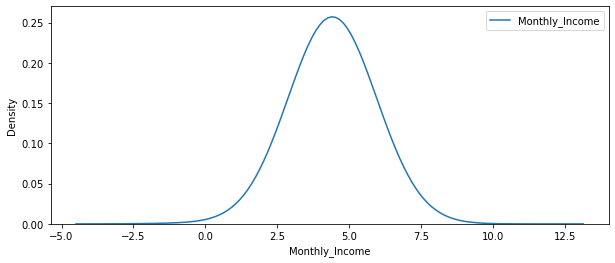

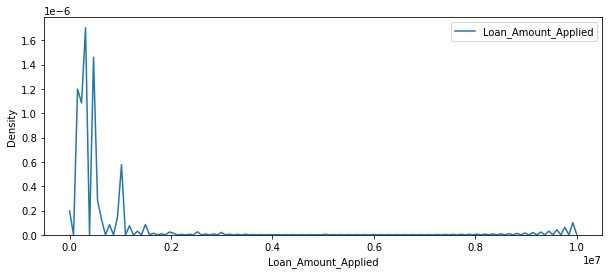

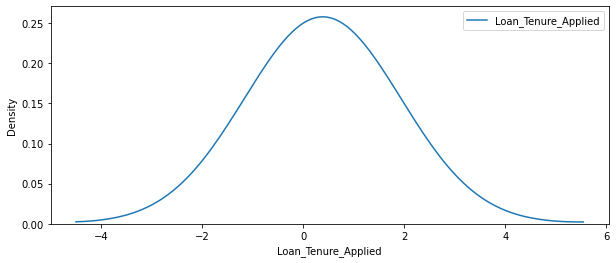

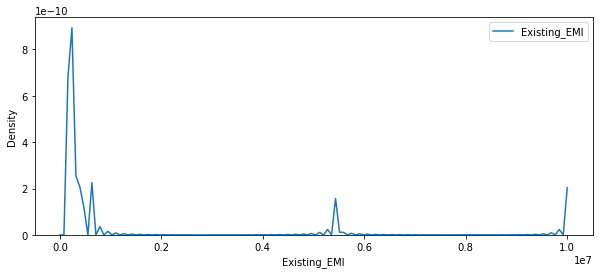

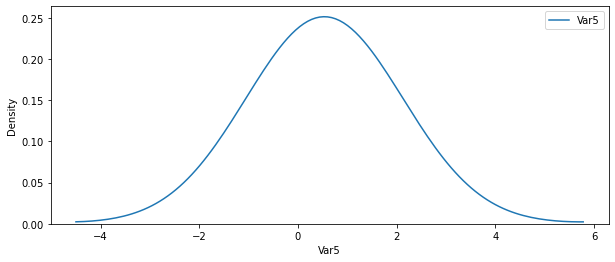

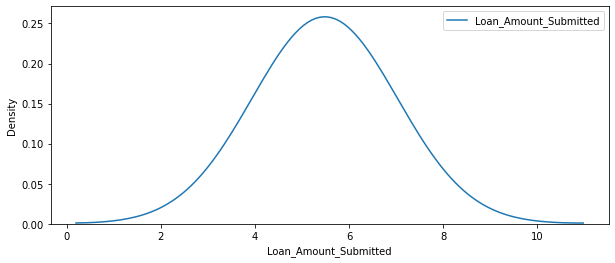

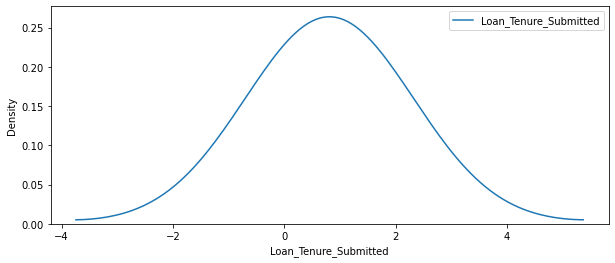

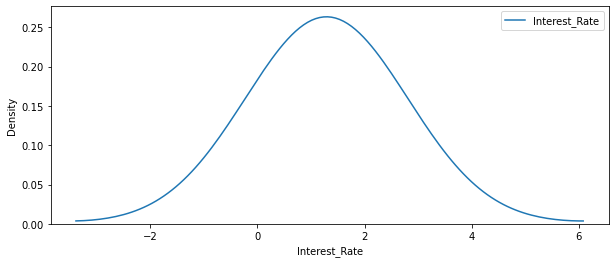

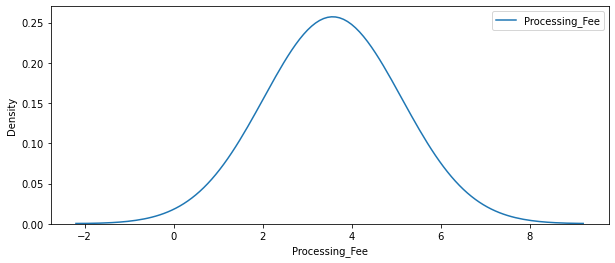

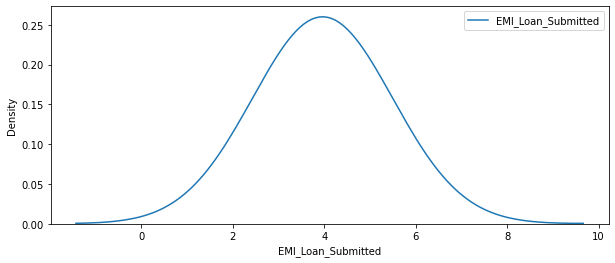

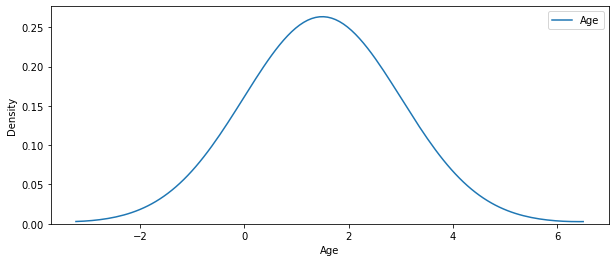

In [116]:
plt.rcParams["figure.figsize"]=(10,4)

def PlotBySample(X1):
    for var in X1.columns:
        sns.distplot(X1[var],hist = False, label= var, kde_kws = {'bw' : 1.5})
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.show()
        
PlotBySample(daneNum)

Widzimy, że zmienne mają już dużo ładniejszy rozkład.

In [117]:
y = dataset['Disbursed']
X = dataset.drop('Disbursed', axis=1)

Zobaczmy jak wzrost wartości cechy wpływa na udział udzielonych pożyczek w całości złożonych wniosków. W tym celu podzielimy sobie wartości cechy na koszyki i policzymy średni udział zmiennej celu = 1 w każdym koszyku.

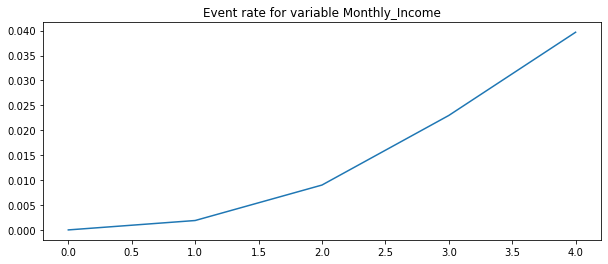

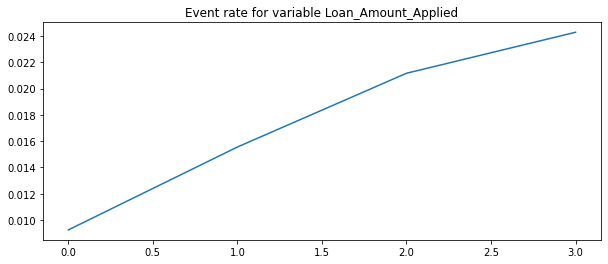

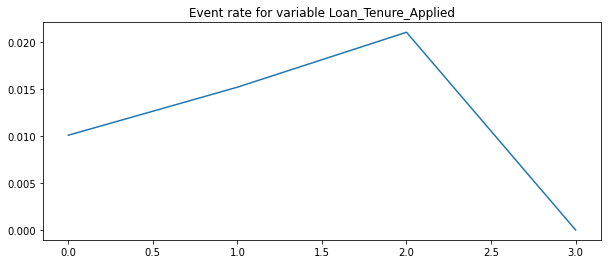

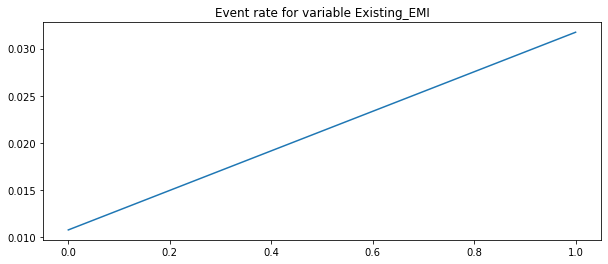

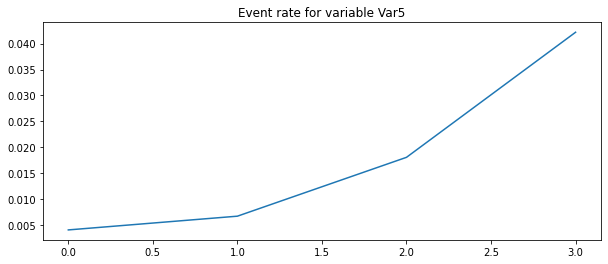

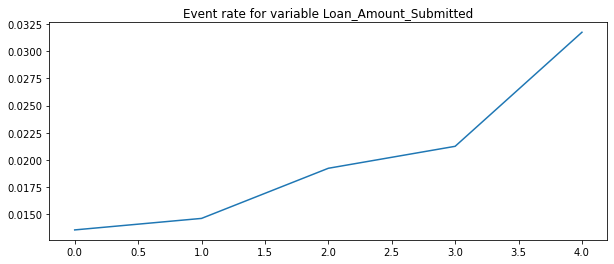

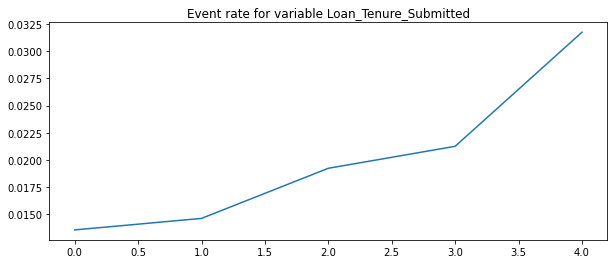

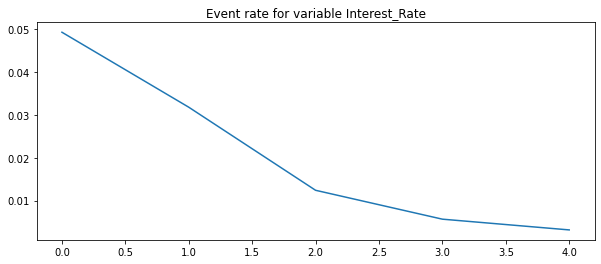

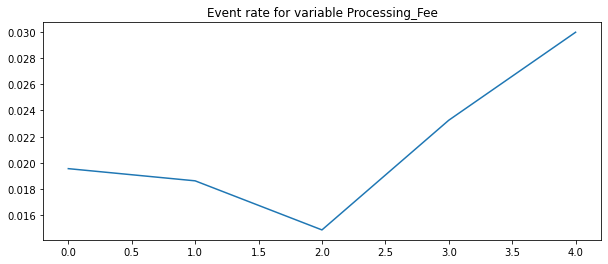

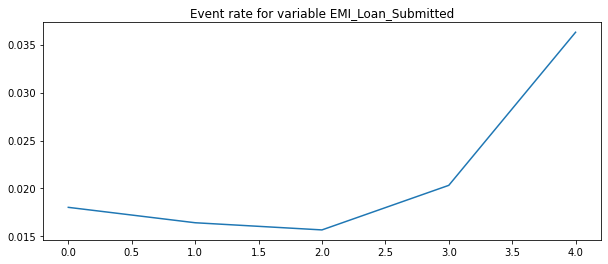

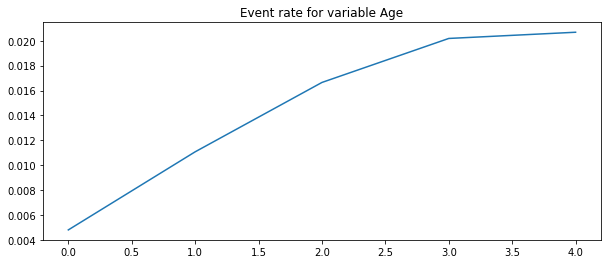

In [118]:
y_group=y.copy()
y_group=pd.DataFrame(y_group)

for var in daneNum:
    y_group[var]=pd.qcut(dataset[var], 5, labels=False,duplicates='drop')
    plt.plot(y_group.groupby([var])['Disbursed'].mean())
    plt.title("Event rate for variable "+var)
    plt.show()

### Analiza zmiennych kategorycznych

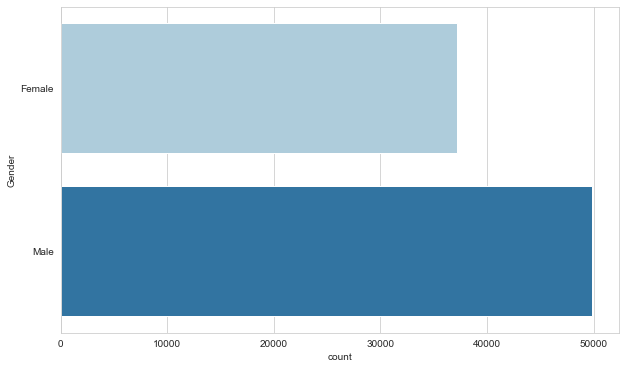

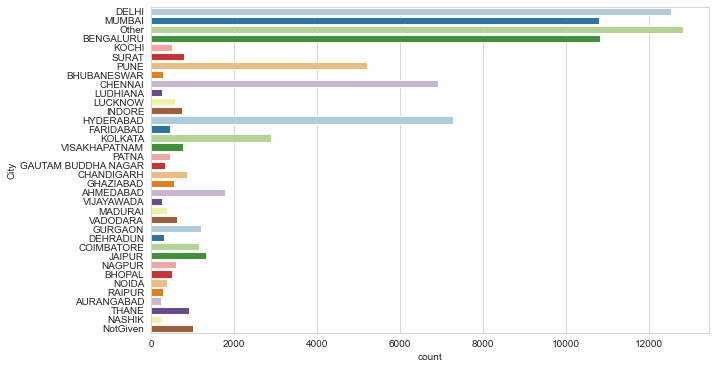

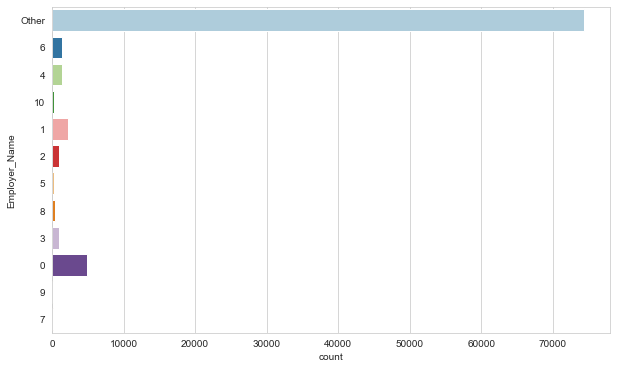

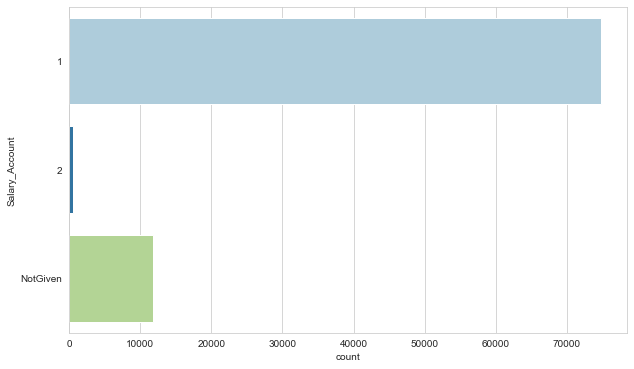

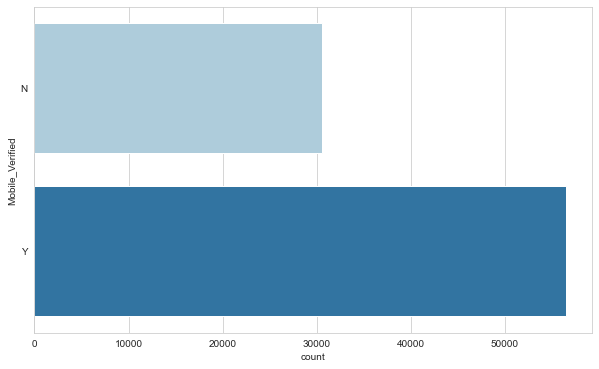

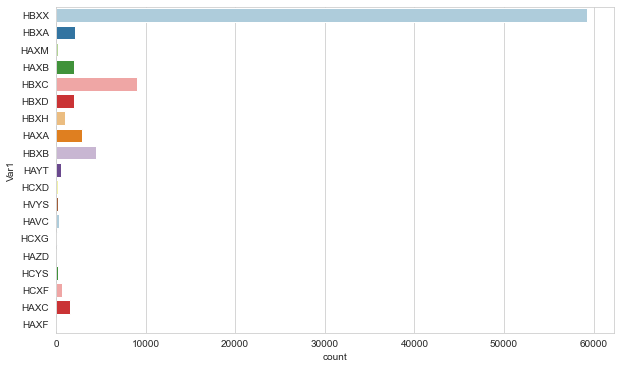

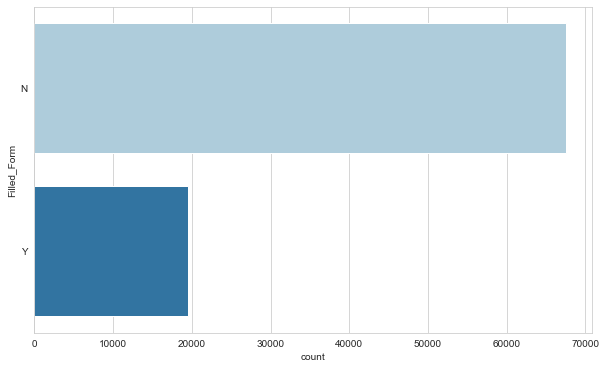

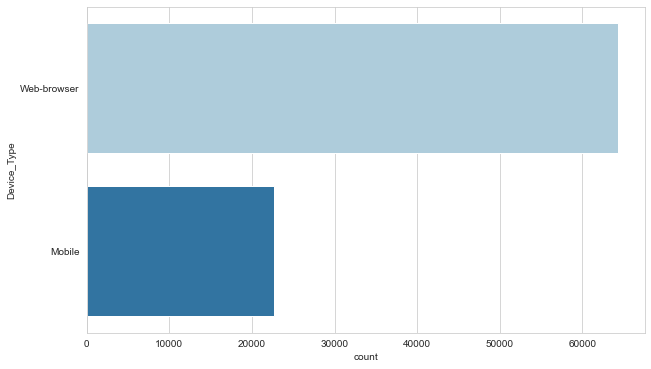

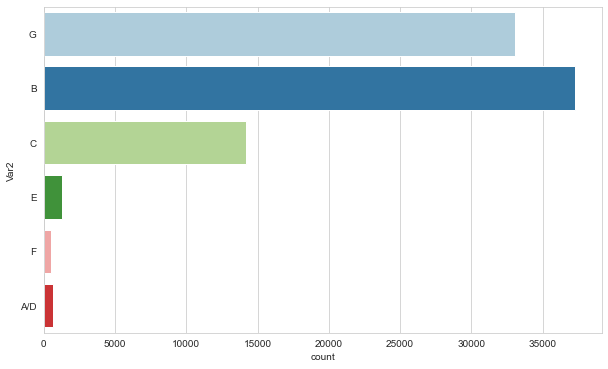

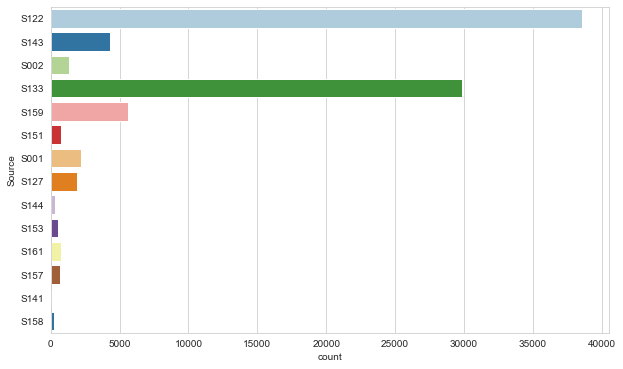

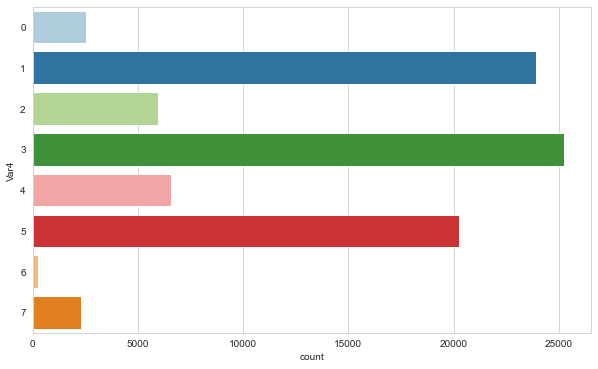

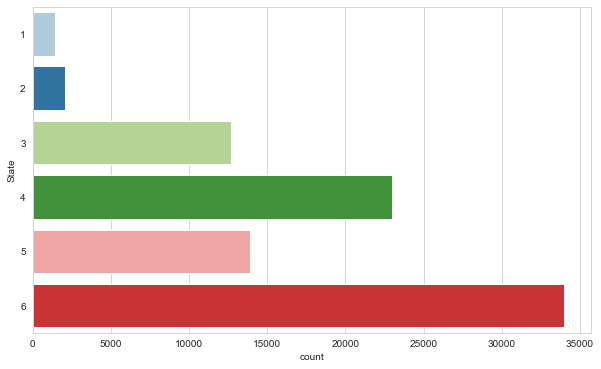

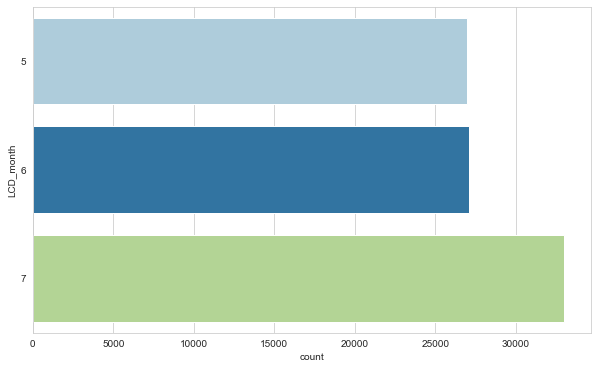

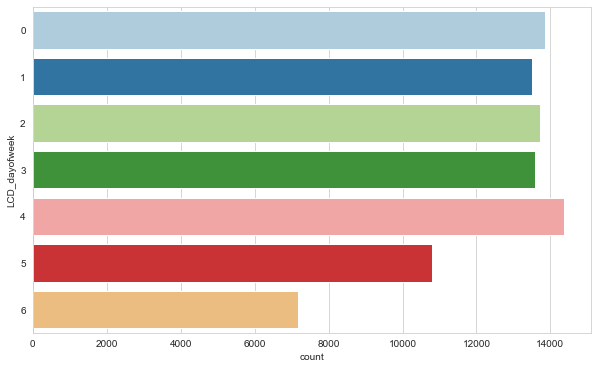

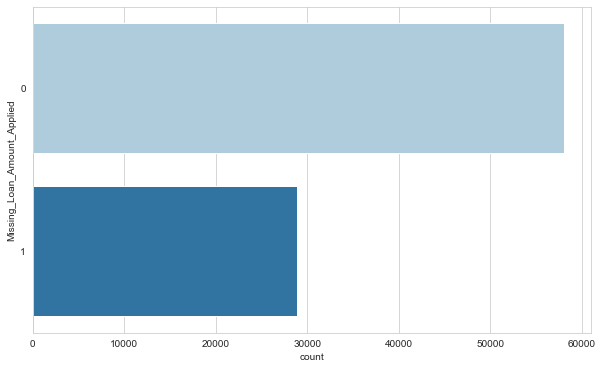

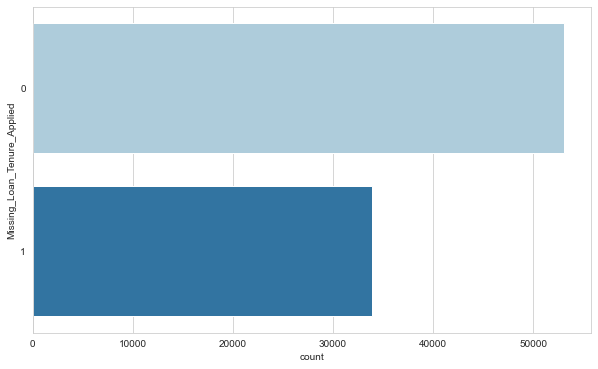

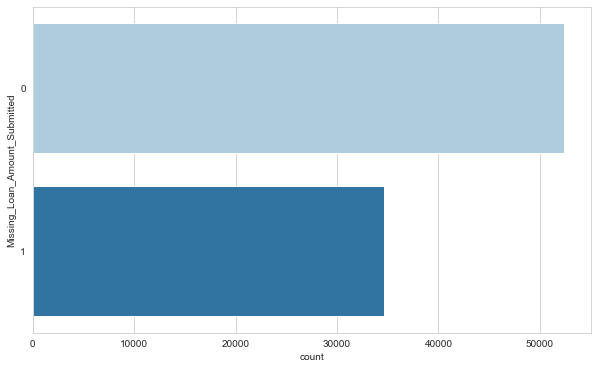

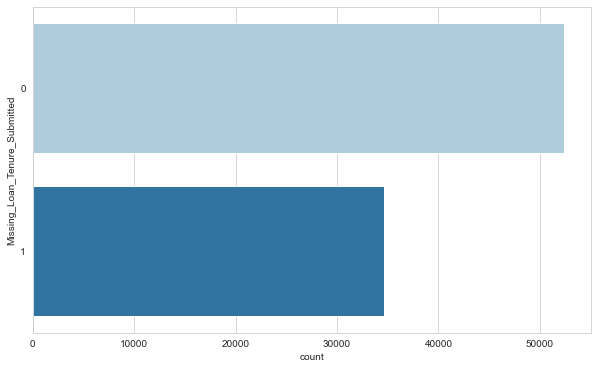

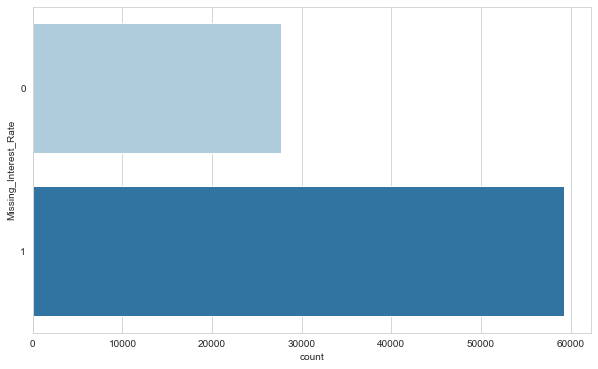

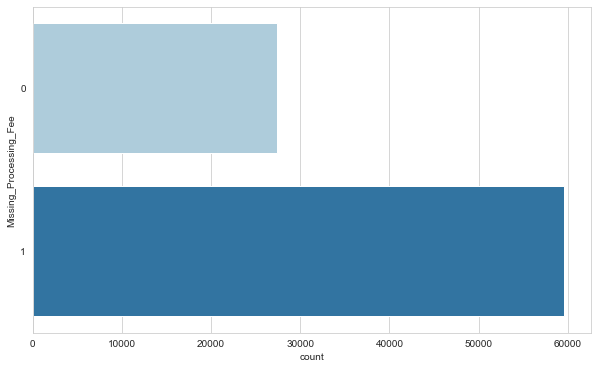

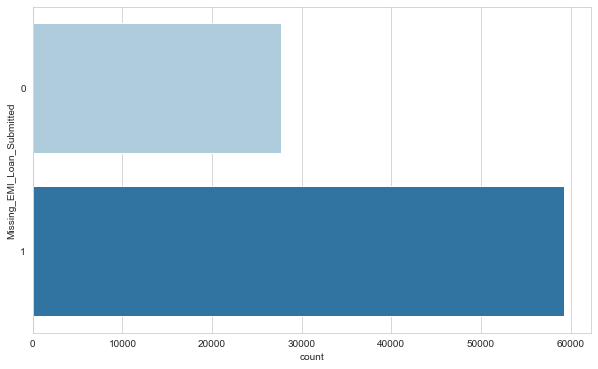

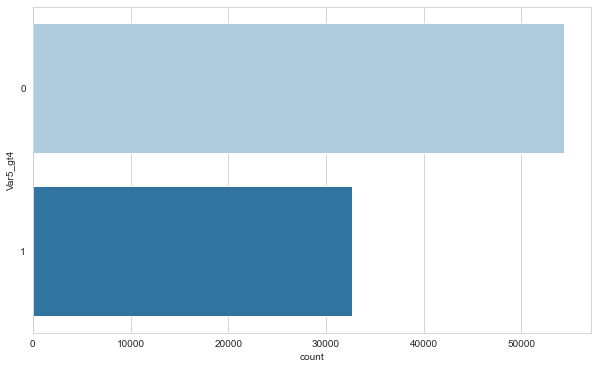

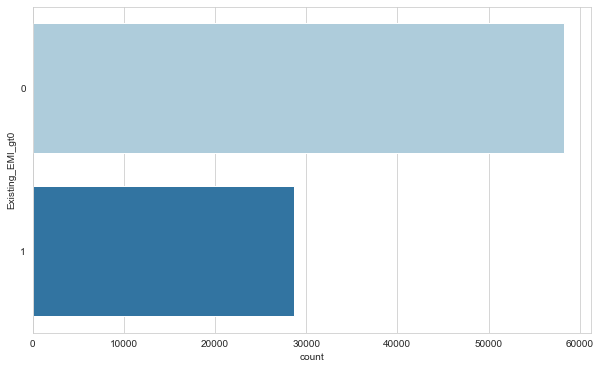

In [119]:
def PlotsChar(X):
    plt.rcParams['figure.figsize'] = [10,6]
    sns.set_style('whitegrid')
    
    for var in X.columns:
        sns.countplot(y=var,data=X,palette='Paired')
        plt.show()
        
PlotsChar(daneChar)

Widzimy, że przy kilku zmiennych występują mało liczne kategorie - daje to potencjał poprawy modelu, w przypadku uzyskania niesatysfakcjonujących wyników. Na ten moment po wcześniej zrobionej wstępnej analizie zostawiam je w takiej formie.

In [120]:
daneChar_y = daneChar.join(y)

Zerknijmy teraz na udziały udzielonych pożyczek w poszczególnych kategoriach zmiennej.

UWAGA! W celu wizualnej poprawy skala na osi OY została zmieniona i rozpoczyna się od 0.8.

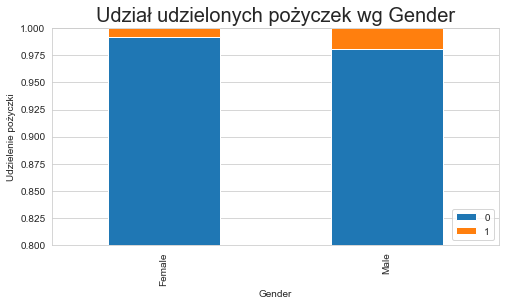

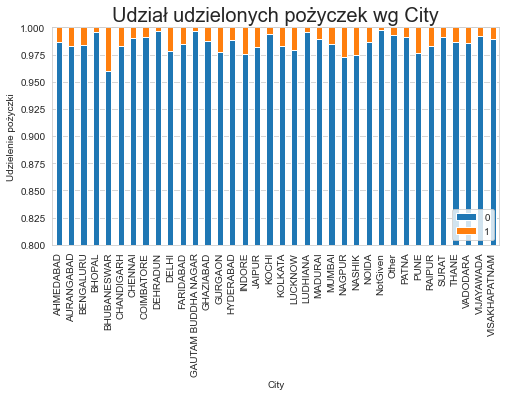

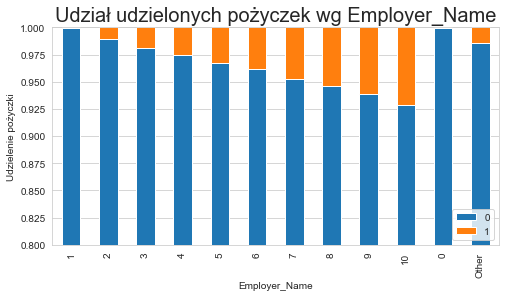

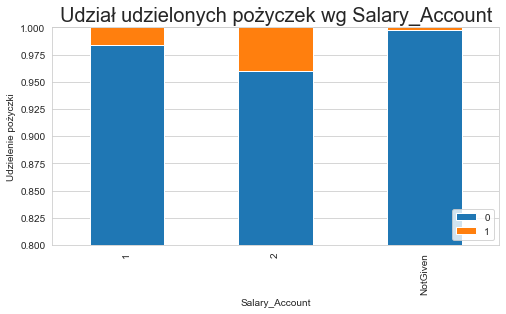

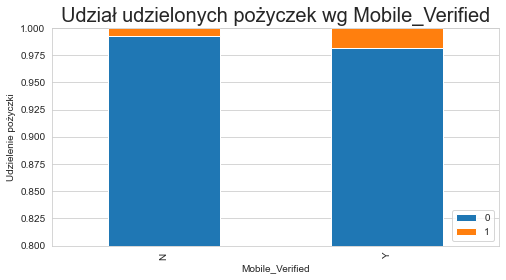

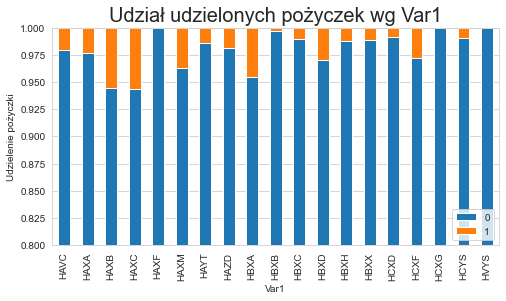

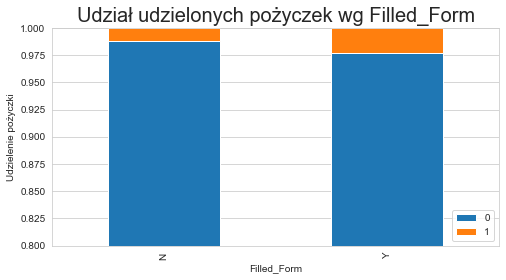

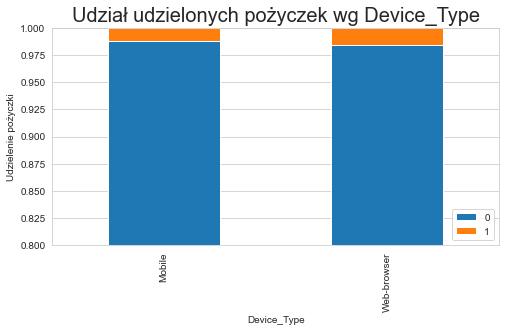

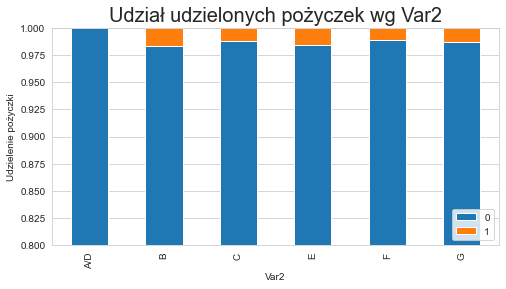

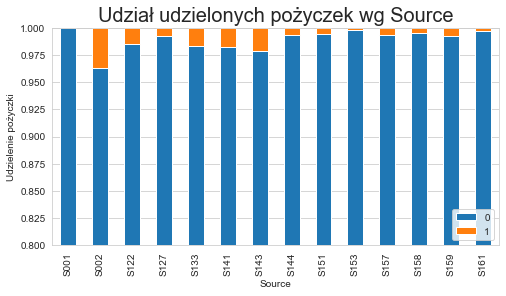

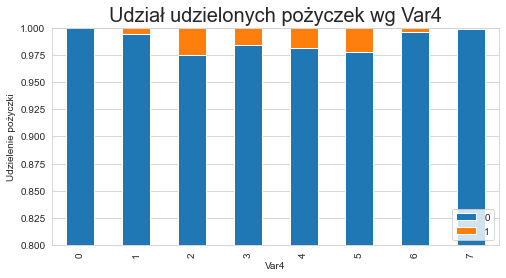

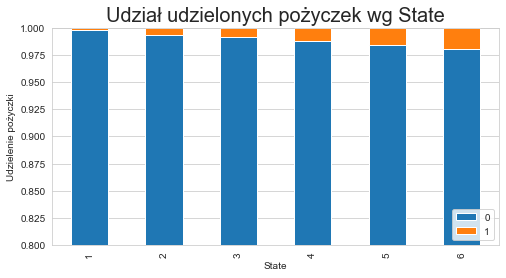

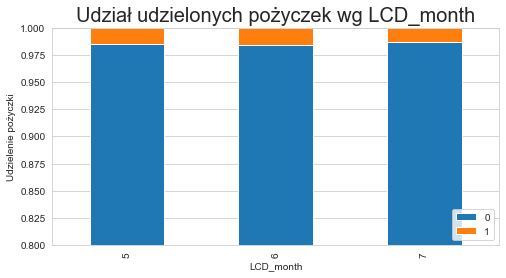

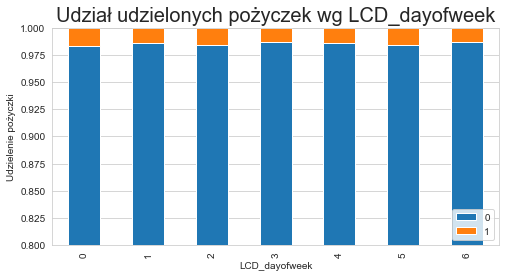

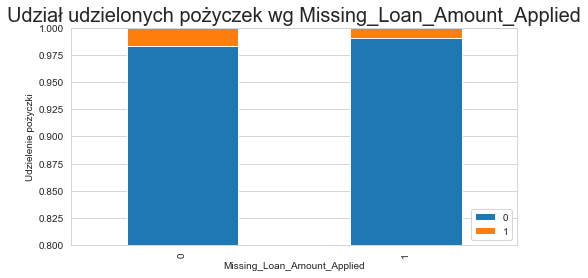

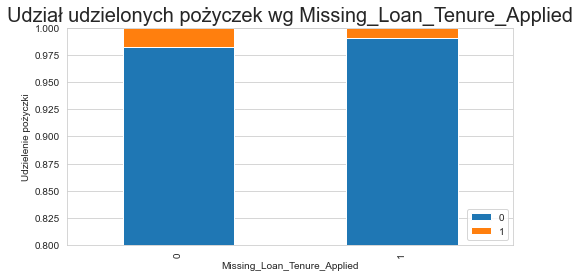

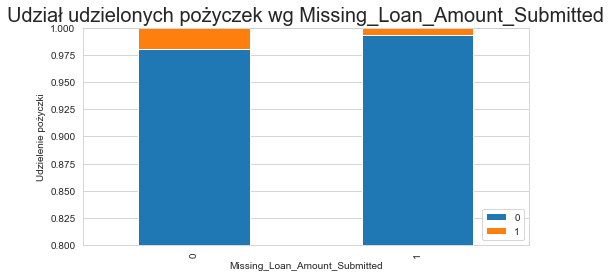

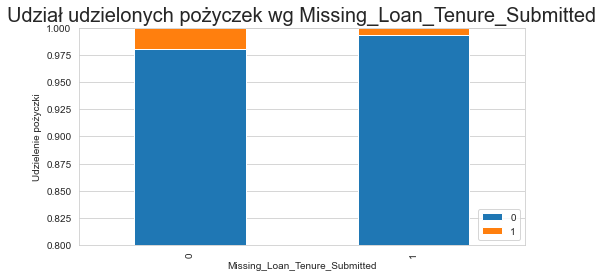

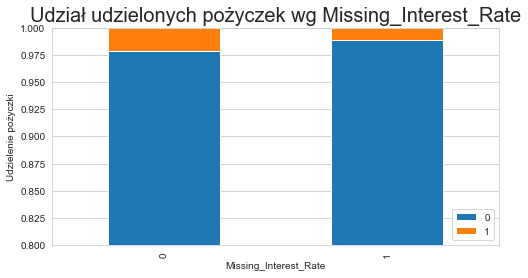

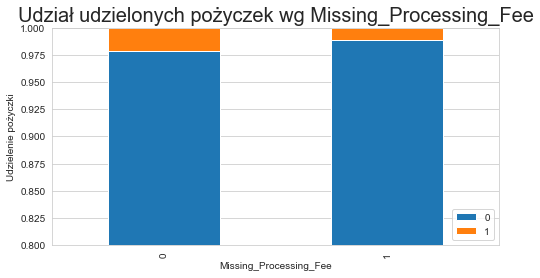

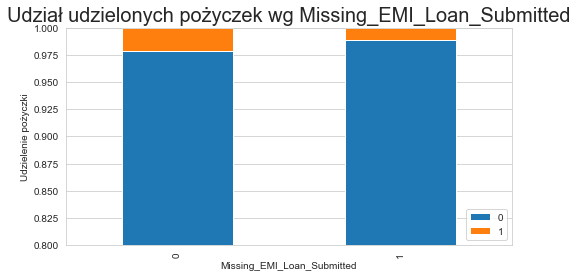

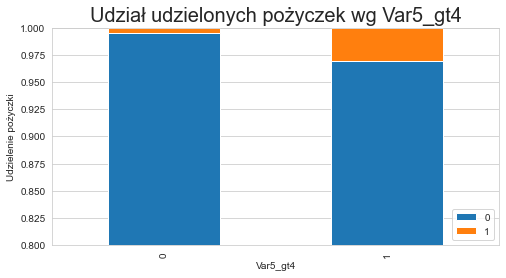

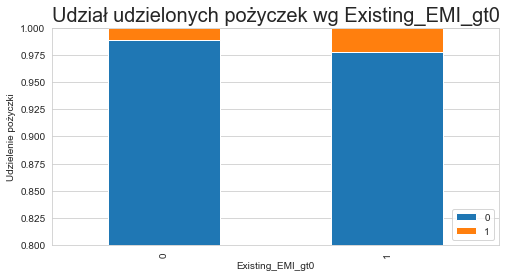

In [121]:
def PlotsCharClass(dane_src,daneChar):
    plt.rcParams['figure.figsize'] = [8,4]
    sns.set_style('whitegrid')

    for i in daneChar.columns:
        table=pd.crosstab(dane_src[i], dane_src['Disbursed'])
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
        plt.xlabel(i)
        plt.ylabel('Udzielenie pożyczki')
        plt.legend(loc='lower right')
        plt.ylim(0.8,1)
        plt.title(f'Udział udzielonych pożyczek wg {i}', fontsize = 20)
        plt.show()
    
PlotsCharClass(daneChar_y, daneChar)

### Analiza wielowymiarowa

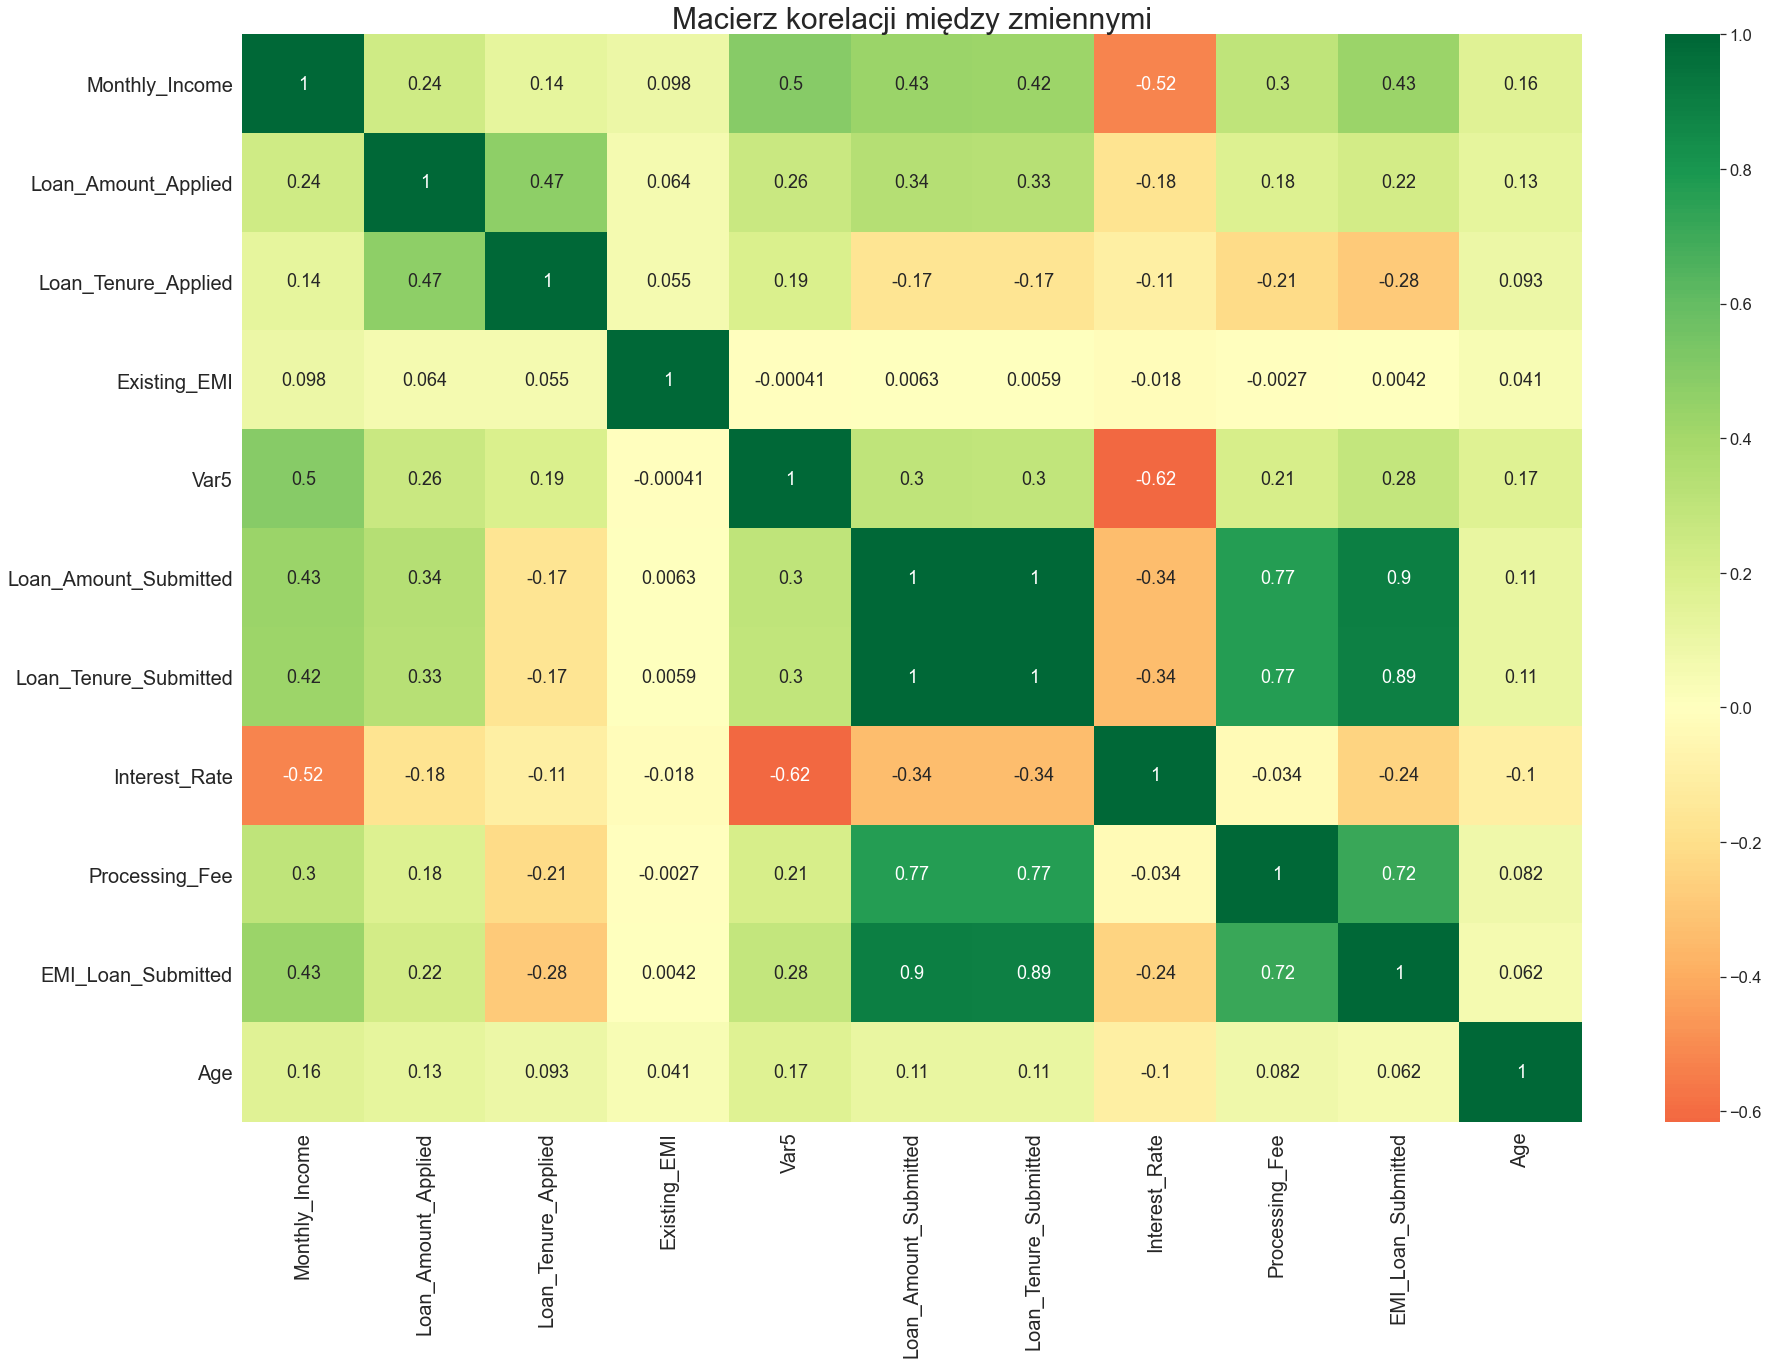

In [123]:
plt.rcParams['figure.figsize'] = [30,20]
sns.set(font_scale=1.5)
sns.heatmap(daneNum.corr(), xticklabels=daneNum.corr().columns, yticklabels=daneNum.corr().columns,cmap='RdYlGn',center=0,annot=True)

plt.title("Macierz korelacji między zmiennymi", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Widzimy, że kilka zmiennych jest ze sobą bardzo silnie zależynych - np. Loan_Tenure_Sibmitted oraz Loan_Amount_Submitted, czy EMI_Loan_Submitted oraz Loan_Amount_Submitted. Należy uważać na współwystępowanie takich zmiennych w modelu.

Rzuciliśmy już okiem jak wyglądają wstępnie przygotowane przez nas zmienne. Możemy zatem wykonać encoding na naszych zmiennych kategorycznych.

In [124]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [125]:
dataset.dtypes # Zmienne po One Hot Encoding mają formaty uint8 - możemy to wykorzystać do ich identyfikacji

Monthly_Income                  float64
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Var5                            float64
                                 ...   
Missing_Interest_Rate_1           uint8
Missing_Processing_Fee_1          uint8
Missing_EMI_Loan_Submitted_1      uint8
Var5_gt4_1                        uint8
Existing_EMI_gt0_1                uint8
Length: 129, dtype: object

### Podział na próbkę treningową i testową

In [126]:
y = dataset['Disbursed']
X = dataset.drop('Disbursed', axis=1)

In [127]:
y.sum()/y.count() # Widać ogromne niezbalansowanie klas. Udział zdarzeń to tylko < 1,5%

0.01462882096069869

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify = y)
print("Liczba obserwacji w zbiorze treningowym: ", y_train.count())
print("Udział wystąpień zdarzeń w zbiorze treningowym: ", round(100*y_train.mean(),2),"%")
print("Liczba obserwacji w zbiorze testowym: ", y_test.count())
print("Udział wystąpień zdarzeń w zbiorze testowym: ", round(100*y_test.mean(),2),"%")

Liczba obserwacji w zbiorze treningowym:  69616
Udział wystąpień zdarzeń w zbiorze treningowym:  1.46 %
Liczba obserwacji w zbiorze testowym:  17404
Udział wystąpień zdarzeń w zbiorze testowym:  1.47 %


### Podział na zmienne numeryczne i dummy variables

Ponownie podzielimy nasze kolumny na dwie grupy - tym razem na zmienne float64. i zmienne powstałe ze zmiennych kategorycznych - uint8.

In [129]:
cs_ohe = ColumnSelectorByType([np.uint8])

daneOHE = cs_ohe.transform(X_train)
daneOHE_test = cs_ohe.transform(X_test)

In [130]:
cs_num = ColumnSelectorByType([np.float64])

daneNum = cs_num.transform(X_train)
daneNum_test = cs_num.transform(X_test)

In [131]:
# daneNum.info()
# daneOHE.info()

In [132]:
variables = pd.DataFrame(daneNum.columns)
variables.columns=['column']
variables = variables.column.unique()

variablesOHE = pd.DataFrame(daneOHE.columns)
variablesOHE.columns=['column']
variablesOHE = variablesOHE.column.unique()

In [133]:
variables

array(['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Loan_Amount_Submitted',
       'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee',
       'EMI_Loan_Submitted', 'Age'], dtype=object)

In [134]:
variablesOHE

array(['Gender_Male', 'City_AURANGABAD', 'City_BENGALURU', 'City_BHOPAL',
       'City_BHUBANESWAR', 'City_CHANDIGARH', 'City_CHENNAI',
       'City_COIMBATORE', 'City_DEHRADUN', 'City_DELHI', 'City_FARIDABAD',
       'City_GAUTAM BUDDHA NAGAR', 'City_GHAZIABAD', 'City_GURGAON',
       'City_HYDERABAD', 'City_INDORE', 'City_JAIPUR', 'City_KOCHI',
       'City_KOLKATA', 'City_LUCKNOW', 'City_LUDHIANA', 'City_MADURAI',
       'City_MUMBAI', 'City_NAGPUR', 'City_NASHIK', 'City_NOIDA',
       'City_NotGiven', 'City_Other', 'City_PATNA', 'City_PUNE',
       'City_RAIPUR', 'City_SURAT', 'City_THANE', 'City_VADODARA',
       'City_VIJAYAWADA', 'City_VISAKHAPATNAM', 'Employer_Name_2',
       'Employer_Name_3', 'Employer_Name_4', 'Employer_Name_5',
       'Employer_Name_6', 'Employer_Name_7', 'Employer_Name_8',
       'Employer_Name_9', 'Employer_Name_10', 'Employer_Name_0',
       'Employer_Name_Other', 'Salary_Account_2',
       'Salary_Account_NotGiven', 'Mobile_Verified_Y', 'Var1_HAXA',
   

In [135]:
class ColumnSelector():
    def __init__(self,variables):
        self.variables=variables
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        return X[self.variables]

### Identyfikacja wartości odstających

In [140]:
outlier=daneNum
q1=outlier.quantile(0.25)
q3=outlier.quantile(0.75)
iqr=q3-q1

low_boundary=(q1-1.5*iqr)
upp_boundary=(q3+1.5*iqr)

num_outliers_l = (outlier[iqr.index]<low_boundary[iqr.index]).sum()
num_outliers_u = (outlier[iqr.index]>upp_boundary[iqr.index]).sum()

outliers_table = pd.DataFrame({'Dolna granica': low_boundary,
                              'Górna granica': upp_boundary,
                              'Liczba outlierów dolnych': num_outliers_l,
                              'Liczba outlierów górnych': num_outliers_u})

num_no_miss = pd.DataFrame(outlier.count())
num_no_miss.columns = ['Liczba obserwacji']

outliers_table = outliers_table.join(num_no_miss)
outliers_table['Procentowy udział outlierów'] = (outliers_table['Liczba outlierów dolnych'] + outliers_table['Liczba outlierów górnych'])/(outliers_table['Liczba obserwacji'])
round(outliers_table,2)

,Dolna granica,Górna granica,Liczba outlierów dolnych,Liczba outlierów górnych,Liczba obserwacji,Procentowy udział outlierów
Monthly_Income,3.64,5.18,799,1401,69616,0.03
Loan_Amount_Applied,-450000.00,750000.00,0,4602,69561,0.07
Loan_Tenure_Applied,-1.05,1.75,0,0,69561,0.00
Existing_EMI,-5250.00,8750.00,0,8840,69561,0.13
Var5,-1.62,2.70,0,0,69616,0.00
Loan_Amount_Submitted,4.70,6.30,287,121,41832,0.01
Loan_Tenure_Submitted,0.76,0.87,287,55,41832,0.01
Interest_Rate,1.04,1.49,0,2389,22223,0.11
Processing_Fee,2.56,4.54,26,39,21971,0.00
EMI_Loan_Submitted,3.36,4.56,117,323,22223,0.02


In [141]:
outlier=daneNum
outlier_std = outlier.std()
outlier_mean = outlier.mean()
 
low_boundary=(outlier_mean -  3 * outlier_std)
upp_boundary=(outlier_mean +  3 * outlier_std)

num_outliers_l = (outlier[iqr.index]<low_boundary[iqr.index]).sum()
num_outliers_u = (outlier[iqr.index]>upp_boundary[iqr.index]).sum()

outliers_table = pd.DataFrame({'Dolna granica': low_boundary,
                              'Górna granica': upp_boundary,
                              'Liczba outlierów dolnych': num_outliers_l,
                              'Liczba outlierów górnych': num_outliers_u})

num_no_miss = pd.DataFrame(outlier.count())
num_no_miss.columns = ['Liczba obserwacji']

outliers_table = outliers_table.join(num_no_miss)
outliers_table['Procentowy udział outlierów'] = (outliers_table['Liczba outlierów dolnych'] + outliers_table['Liczba outlierów górnych'])/(outliers_table['Liczba obserwacji'])
round(outliers_table,2)

,Dolna granica,Górna granica,Liczba outlierów dolnych,Liczba outlierów górnych,Liczba obserwacji,Procentowy udział outlierów
Monthly_Income,3.11,5.70,477,206,69616,0.01
Loan_Amount_Applied,-833850.47,1295341.98,0,862,69561,0.01
Loan_Tenure_Applied,-0.60,1.37,0,0,69561,0.00
Existing_EMI,-129013.94,136548.30,0,35,69561,0.00
Var5,-0.89,1.96,0,0,69616,0.00
Loan_Amount_Submitted,4.54,6.43,0,5,41832,0.00
Loan_Tenure_Submitted,0.75,0.87,0,0,41832,0.00
Interest_Rate,0.96,1.62,0,0,22223,0.00
Processing_Fee,2.53,4.61,22,3,21971,0.00
EMI_Loan_Submitted,3.19,4.74,30,32,22223,0.00


Metoda z 3 odchyleniami jest mniej konserwatywna i wymaga modyfikacji mniejszej liczby obserwacji - spróbuję ją zastosować. Tu również pozostaje pole do testowania i udoskonalenia. 

In [142]:
# Podejście 1
# Wartości odstające na podstawie rozstępu międzykwartylowegooutlier=daneNum
# outlier=daneNum
# q1=outlier.quantile(0.25)
# q3=outlier.quantile(0.75)
# iqr=q3-q1

# low_boundary=(q1-1.5*iqr)
# upp_boundary=(q3+1.5*iqr)
 
# Podejście 2    
# Wartości odstające na podstawie trzech sigm   
outlier=daneNum
outlier_std = outlier.std()
outlier_mean = outlier.mean()
 
low_boundary=(outlier_mean -  3 * outlier_std)
upp_boundary=(outlier_mean +  3 * outlier_std)    

    
class Outliers(TransformerMixin,BaseEstimator):
   
    def __init__(self,low_boundary,upp_boundary,variables):
        self.low_boundary=low_boundary
        self.upp_boundary=upp_boundary
        self.variables=variables
 
    def fit(self,X):
        return self
   
    def transform(self,X):
        for var in self.variables:
            X.loc[X[var]<self.low_boundary[var],var]=self.low_boundary[var]
            X.loc[X[var]>self.upp_boundary[var],var]=self.upp_boundary[var]
        return X

### Uzupełnianie braków

In [143]:
#Nadpisanie braków danych medianami
 
class ImputerMe(TransformerMixin,BaseEstimator):
   
    def __init__(self,variables):
        self.variables=variables        
    
    def fit(self,X,y=None):
        self.medians={}
        for i in self.variables:
            self.medians[i]=X[i].median()
        return self
   
    def transform(self,X):
        for i in self.variables:
            X[i]=X[i].transform(lambda x: x.fillna(self.medians[i]))
        return X  

In [144]:
#Nadpisanie braków danych średnimi

class ImputerMean(TransformerMixin,BaseEstimator):
   
    def __init__(self,variables):
        self.variables=variables        
    
    def fit(self,X,y=None):
        self.mean={}
        for i in self.variables:
            self.means[i]=X[i].mean()
        return self
   
    def transform(self,X):
        for i in self.variables:
            X[i]=X[i].transform(lambda x: x.fillna(self.means[i]))
        return X  

In [145]:
#Nadpisanie braków danych zerami

class ImputerZeros(TransformerMixin,BaseEstimator):
   
    def __init__(self,variables):
        self.variables=variables        
    
    def fit(self,X,y=None):
        return self
   
    def transform(self,X):
        for i in self.variables:
            X[i]=X[i].transform(lambda x: x.fillna(0))
        return X  

### Standaryzacja/ normalizacja

Tu wypróbujemy min-max - sprowadza nam zmienne do przedziału 0-1. W alternatywie pozostaje oczywiście StandardScaler.

In [146]:
class Normalize(TransformerMixin,BaseEstimator):

    def __init__(self,variables):
        self.variables=variables 
            
    def fit(self,X):       
        self.lst=[]
        for var in self.variables:
            self.lst.append({
                'Variable':var,
                'min': X[var].min(),
                'max_min':  X[var].max()-X[var].min()
                })
        self.lst=pd.DataFrame(self.lst)           
        return self
       
    def transform(self,X):
        for var in self.variables:
            X[var]=(X[var]-self.lst[self.lst['Variable']==var]['min'].values)/self.lst[self.lst['Variable']==var]['max_min'].values
  
        return X

### Pipeline

In [147]:
pipeline=FeatureUnion([
    ("branch1",make_pipeline(ColumnSelector(variables),
                             Outliers(low_boundary,upp_boundary,outlier.columns.to_list()),
                             ImputerMe(['Loan_Amount_Applied','Loan_Tenure_Applied','Existing_EMI','Loan_Amount_Submitted','Loan_Tenure_Submitted','Interest_Rate','Processing_Fee','EMI_Loan_Submitted']),
#                              StandardScaler()
                             Normalize(variables)
                            )
    ),
     ("branch2",make_pipeline(ColumnSelector(variablesOHE)
                              ))
])

In [148]:
X_train_copy=X_train.copy()
X_train=pd.DataFrame(pipeline.fit_transform(X_train))

In [149]:
X_test_copy=X_test.copy()
X_test=pd.DataFrame(pipeline.fit_transform(X_test))

Przywracamy nazwy kolumn, które zostały utracone podczas wykonywania Pipelina.

In [150]:
X_train.columns=list(variables)+list(variablesOHE)
X_test.columns=list(variables)+list(variablesOHE)

In [151]:
pd.DataFrame(X_train.describe().T).head(50)

,count,mean,std,min,25%,50%,75%,max
Monthly_Income,69616.0,0.504906,0.125334,0.0,0.427991,0.497587,0.576311,1.0
Loan_Amount_Applied,69616.0,0.169569,0.215113,0.0,0.000000,0.077200,0.231599,1.0
Loan_Tenure_Applied,69616.0,0.369284,0.314971,0.0,0.000000,0.458157,0.671188,1.0
Existing_EMI,69616.0,0.025755,0.065835,0.0,0.000000,0.000000,0.025632,1.0
Var5,69616.0,0.419232,0.371220,0.0,0.000000,0.373114,0.843932,1.0
Loan_Amount_Submitted,69616.0,0.452192,0.141087,0.0,0.449449,0.449449,0.495183,1.0
Loan_Tenure_Submitted,69616.0,0.471387,0.139165,0.0,0.471310,0.471310,0.516054,1.0
Interest_Rate,69616.0,0.362328,0.134990,0.0,0.354255,0.354255,0.354255,1.0
Processing_Fee,69616.0,0.510563,0.093802,0.0,0.515413,0.515413,0.515413,1.0
EMI_Loan_Submitted,69616.0,0.504763,0.093971,0.0,0.506998,0.506998,0.506998,1.0


In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17404 entries, 0 to 17403
Columns: 128 entries, Monthly_Income to Existing_EMI_gt0_1
dtypes: float64(128)
memory usage: 17.0 MB


## Modelowanie

### Model regresji logistycznej

Z powodu wysokiego niezbalansowania klas posłużymy się regresją logistyczną z ważoną funkcją celu. Jako wagę dla kategrii 1 przyjmiemy 67 - stosunek klasy 0 do klasy 1. Ponadto wykorzystamy regularyzację 'L1', która zeruje wartości nieistotnych parametrów (selekcja zmiennych).

In [153]:
model = LogisticRegression(solver = 'liblinear', penalty='l1', max_iter = 100,
                          class_weight = {
                              0:1,
                              1:67
                          })
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 67}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Krzywa ROC na próbie treningowej.

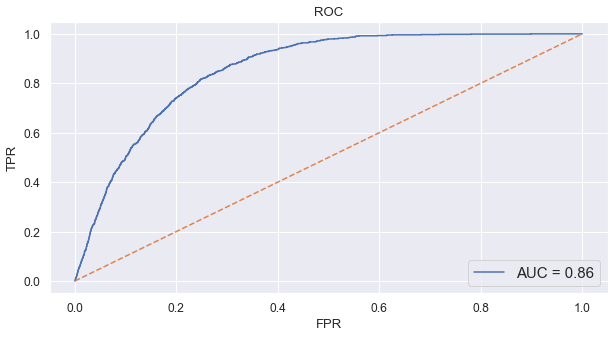

In [155]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej.

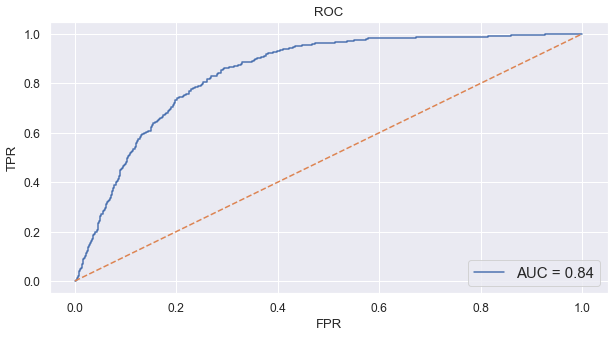

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [157]:
ACC_LR_1 = accuracy_score(y_test, y_pred_test)
AUC_LR_1 = roc_auc_score(y_test, y_pred_proba_test)
PS_LR_1 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_LR_1 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_LR_1 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla regresji logistycznej:\n')
print('Accuracy score: ', round(ACC_LR_1,2))
print('AUC score: ', round(AUC_LR_1,2))
print('Precision score: ', round(PS_LR_1,2))
print('Recall score: ', round(RS_LR_1,2))
print('F1 score: ', round(F1S_LR_1,2))

Wyniki dla regresji logistycznej:

Accuracy score:  0.75
AUC score:  0.84
Precision score:  0.05
Recall score:  0.79
F1 score:  0.09


In [158]:
print('Confusion_matrix:')
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))

Confusion_matrix:
[[12921  4228]
 [   54   201]]


### Model Regresji Logistycznej z optymalizacją parametrów

In [159]:
param_grid = {
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1, 1],
}
param_grid

{'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1]}

In [160]:
grid_LR = GridSearchCV(estimator=LogisticRegression(solver='liblinear',                                       
                                                    max_iter=100,
                                                    class_weight = {0:1,
                                                                    1:67}
                                                   ),
                    param_grid=param_grid,
                    cv=5)

In [161]:
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 67},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [162]:
grid_LR.best_estimator_

LogisticRegression(C=1, class_weight={0: 1, 1: 67}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Uczymy model, który okazał się najlepszy - wtym wypadku z parametrami C=1. Możnaby się pokusić o rozszerzenie zakresu parametrów, ze względu na to, że C=1 znajduje się na granicy, jednakże ze względu na dużą pracochłonność zostawimy 1-kę jako wynik tej optymalizacji. 

Przy dalszym rozwoju modelu można przetesować również regularyzację L2, różne scalery lub też podejścia do encodingu.

In [164]:
model_LR = LogisticRegression(solver = 'liblinear', penalty='l1', C= 1, max_iter = 100,
                          class_weight = {
                              0:1,
                              1:67
                          })
model_LR.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 67}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
y_pred_proba_train = model_LR.predict_proba(X_train)[:, 1]
y_pred_proba_test = model_LR.predict_proba(X_test)[:, 1]

y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)

Krzywa ROC na próbie treningowej.

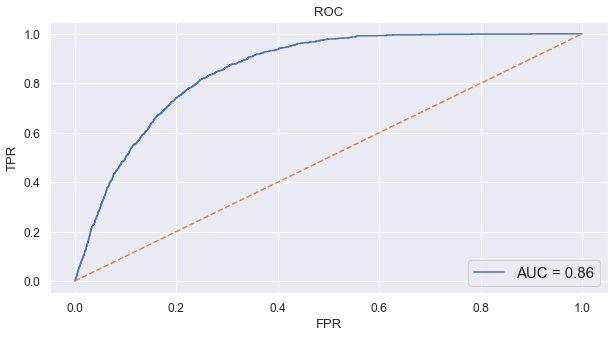

In [166]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej.

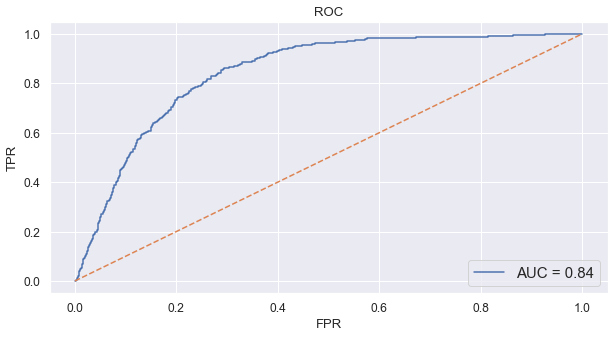

In [167]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [168]:
ACC_LR_2 = accuracy_score(y_test, y_pred_test)
AUC_LR_2 = roc_auc_score(y_test, y_pred_proba_test)
PS_LR_2 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_LR_2 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_LR_2 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla regresji logistycznej z optymalizacją parametrów:\n')
print('Accuracy score: ', round(ACC_LR_2,2))
print('AUC score: ', round(AUC_LR_2,2))
print('Precision score: ', round(PS_LR_2,2))
print('Recall score: ', round(RS_LR_2,2))
print('F2 score: ', round(F1S_LR_2,2))

Wyniki dla regresji logistycznej z optymalizacją parametrów:

Accuracy score:  0.75
AUC score:  0.84
Precision score:  0.05
Recall score:  0.79
F2 score:  0.09


## Drzewo decyzyjne

In [169]:
model_DT = DecisionTreeClassifier(class_weight= {0:1, 1:67})
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 67},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [170]:
y_pred_proba_train = model_DT.predict_proba(X_train)[:, 1]
y_pred_proba_test = model_DT.predict_proba(X_test)[:, 1]

y_pred_train = model_DT.predict(X_train)
y_pred_test = model_DT.predict(X_test)

Krzywa ROC na próbie treningowej.

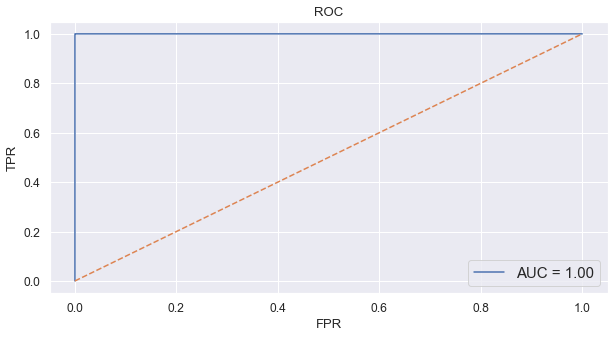

In [171]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej.

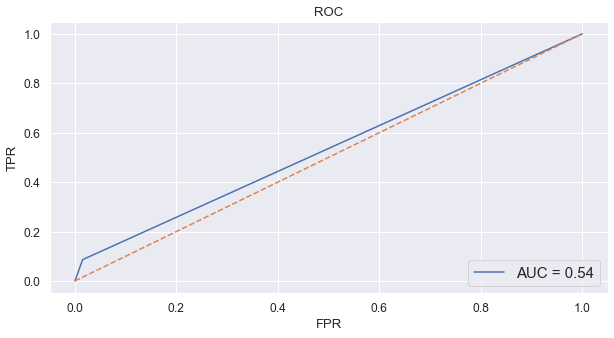

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [173]:
ACC_DT_1 = accuracy_score(y_test, y_pred_test)
AUC_DT_1 = roc_auc_score(y_test, y_pred_proba_test)
PS_DT_1 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_DT_1 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_DT_1 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla drzewa decyzyjnego:\n')
print('Accuracy score: ', round(ACC_DT_1,2))
print('AUC score: ', round(AUC_DT_1,2))
print('Precision score: ', round(PS_DT_1,2))
print('Recall score: ', round(RS_DT_1,2))
print('F1 score: ', round(F1S_DT_1,2))

Wyniki dla drzewa decyzyjnego:

Accuracy score:  0.97
AUC score:  0.54
Precision score:  0.08
Recall score:  0.09
F1 score:  0.08


Widzimy, że model z tymi parametrami jest strasznie przeuczony!!!

### Drzewo decyzyjne z optymalizacją parametrów

In [174]:
param_grid_DT = {
    'max_depth': [10, 15],
    'min_samples_leaf': [3, 5, 7, 9, 10]
}

In [175]:
grid_DT = GridSearchCV(estimator = DecisionTreeClassifier(class_weight= {0:1, 1:67}), 
                       param_grid=param_grid_DT, 
                       cv=5)

grid_DT.fit(X_train, y_train)
grid_DT.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 67},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

Uczymy model, który okazał się najlepszy.

In [176]:
model_DT = DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, class_weight= {0:1, 1:67})
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 67},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [177]:
y_pred_proba_train = model_DT.predict_proba(X_train)[:, 1]
y_pred_proba_test = model_DT.predict_proba(X_test)[:, 1]

y_pred_train = model_DT.predict(X_train)
y_pred_test = model_DT.predict(X_test)

Krzywa ROC na próbie treningowej

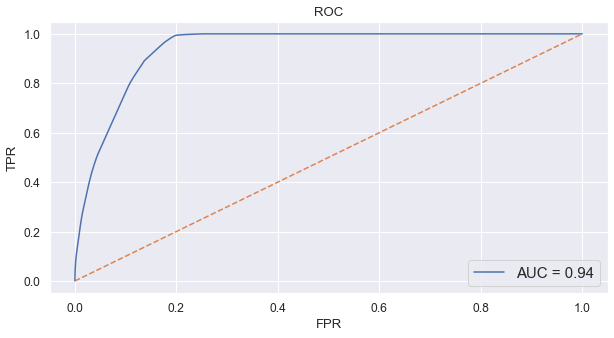

In [178]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej

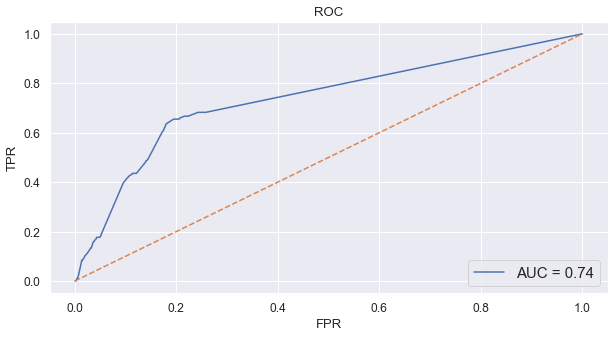

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [180]:
ACC_DT_2 = accuracy_score(y_test, y_pred_test)
AUC_DT_2 = roc_auc_score(y_test, y_pred_proba_test)
PS_DT_2 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_DT_2 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_DT_2 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla drzewa decyzyjnego z optymalizacją parametrów:\n')
print('Accuracy score: ', round(ACC_DT_2,2))
print('AUC score: ', round(AUC_DT_2,2))
print('Precision score: ', round(PS_DT_2,2))
print('Recall score: ', round(RS_DT_2,2))
print('F2 score: ', round(F1S_DT_2,2))

Wyniki dla drzewa decyzyjnego z optymalizacją parametrów:

Accuracy score:  0.79
AUC score:  0.74
Precision score:  0.05
Recall score:  0.65
F2 score:  0.09


### Random Forest

In [181]:
model_RF = RandomForestClassifier(class_weight= {0:1, 1:67})
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 67}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [182]:
y_pred_train = model_RF.predict(X_train)
y_pred_test = model_RF.predict(X_test)

y_pred_proba_train = model_RF.predict_proba(X_train)[:, 1]
y_pred_proba_test = model_RF.predict_proba(X_test)[:, 1]

Krzywa ROC na próbie treningowej

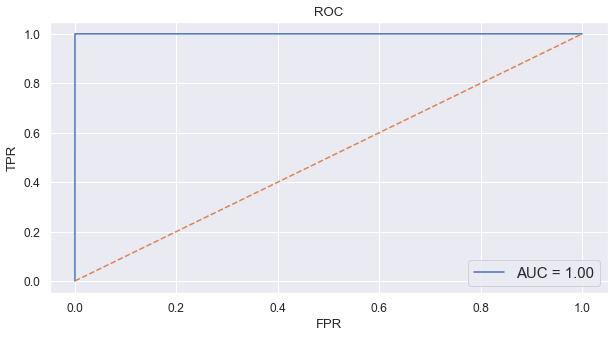

In [183]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej

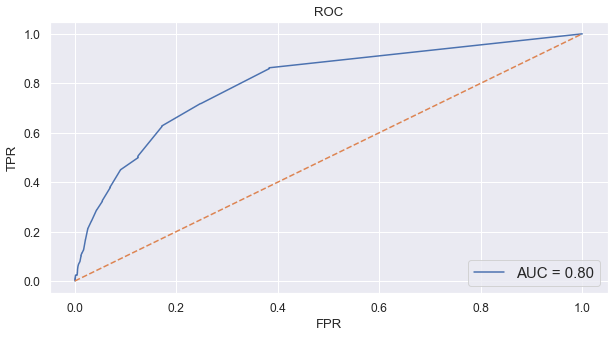

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [185]:
ACC_RF_1 = accuracy_score(y_test, y_pred_test)
AUC_RF_1 = roc_auc_score(y_test, y_pred_proba_test)
PS_RF_1 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_RF_1 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_RF_1 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla lasu losowego:\n')
print('Accuracy score: ', round(ACC_RF_1,2))
print('AUC score: ', round(AUC_RF_1,2))
print('Precision score: ', round(PS_RF_1,2))
print('Recall score: ', round(RS_RF_1,2))
print('F2 score: ', round(F1S_RF_1,2))

Wyniki dla lasu losowego:

Accuracy score:  0.99
AUC score:  0.8
Precision score:  0.25
Recall score:  0.0
F2 score:  0.01


### Random Forest z optymalizacja parametrów

In [187]:
param_grid_RF = {
    'max_depth': [10, 15],
    'min_samples_leaf': [3, 5, 7]
#     ,'n_estimators': [100, 200, 300]
}

In [190]:
grid_RF = GridSearchCV(estimator = DecisionTreeClassifier(class_weight= {0:1, 1:67}), 
                       param_grid=param_grid_RF, 
                       cv=5)
grid_RF.fit(X_train, y_train)
grid_RF.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 67},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

Uczymy model, który okazał się najlepszy.

In [191]:
model_RF = RandomForestClassifier(max_depth=15, min_samples_leaf=3, class_weight= {0:1, 1:67})
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 67}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [192]:
y_pred_train = model_RF.predict(X_train)
y_pred_test = model_RF.predict(X_test)

y_pred_proba_train = model_RF.predict_proba(X_train)[:, 1]
y_pred_proba_test = model_RF.predict_proba(X_test)[:, 1]

Krzywa ROC na próbie treningowej.

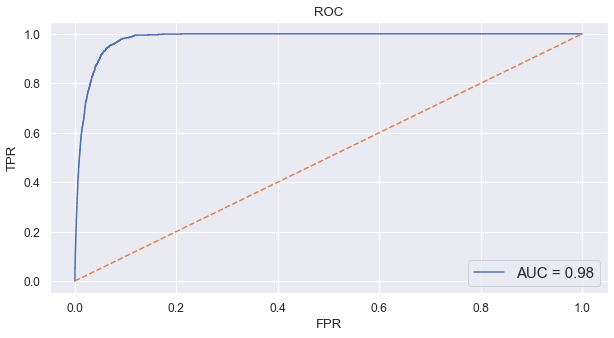

In [193]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train)

sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_train, y_pred_proba_train))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

Krzywa ROC na próbie testowej.

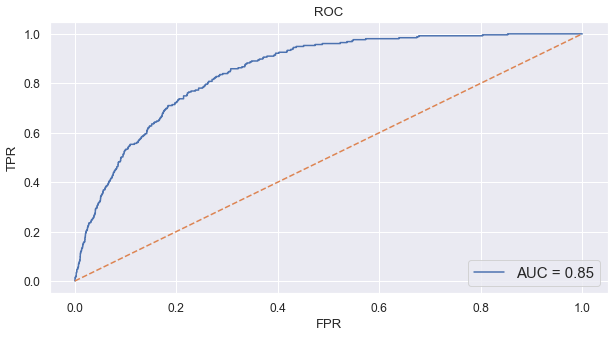

In [194]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)

plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc_score(y_test, y_pred_proba_test))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc="lower right", prop={'size':15})
plt.show()

In [195]:
ACC_RF_2 = accuracy_score(y_test, y_pred_test)
AUC_RF_2 = roc_auc_score(y_test, y_pred_proba_test)
PS_RF_2 = precision_score(y_true=y_test, y_pred=y_pred_test)
RS_RF_2 = recall_score(y_true=y_test, y_pred=y_pred_test)
F1S_RF_2 = f1_score(y_true=y_test, y_pred=y_pred_test)

print('Wyniki dla lasu losowego z optymalizacją parametrów:\n')
print('Accuracy score: ', round(ACC_RF_2,2))
print('AUC score: ', round(AUC_RF_2,2))
print('Precision score: ', round(PS_RF_2,2))
print('Recall score: ', round(RS_RF_2,2))
print('F2 score: ', round(F1S_RF_2,2))

Wyniki dla lasu losowego z optymalizacją parametrów:

Accuracy score:  0.92
AUC score:  0.85
Precision score:  0.08
Recall score:  0.43
F2 score:  0.13


## Podsumowanie

In [197]:
wyniki = pd.DataFrame({'Model': ['Regresja logistyczna',
                                 'Regresja logistyczna z optymalizacją',
                                 'Drzewo decyzyjne',
                                 'Drzewo decyzyjne z optymalizacją',
                                 'Las losowy',
                                 'Las losowy z optymalizacją'],
                       
                       'Accuracy' : [ACC_LR_1, ACC_LR_2, ACC_DT_1, ACC_DT_2, ACC_RF_1, ACC_RF_2],
                                                              
                       'AUC': [AUC_LR_1, AUC_LR_2, AUC_DT_1, AUC_DT_2, AUC_RF_1, AUC_RF_2],
                                   
                       'Precision' : [PS_LR_1, PS_LR_2, PS_DT_1, PS_DT_2, PS_RF_1, PS_RF_2],
                                     
                       'Recall' : [RS_LR_1, RS_LR_2, RS_DT_1, RS_DT_2, RS_RF_1, RS_RF_2],
                       
                       'F1' : [F1S_LR_1, F1S_LR_2, F1S_DT_1, F1S_DT_2, F1S_RF_1, F1S_RF_2],
                                         
                      })



wyniki

,Model,Accuracy,AUC,Precision,Recall,F1
0,Regresja logistyczna,0.753965,0.844454,0.045383,0.788235,0.085824
1,Regresja logistyczna z optymalizacją,0.753562,0.844511,0.045311,0.788235,0.085696
2,Drzewo decyzyjne,0.971673,0.535557,0.078014,0.086275,0.081937
3,Drzewo decyzyjne z optymalizacją,0.794702,0.736348,0.045728,0.654902,0.085488
4,Las losowy,0.985233,0.799879,0.250000,0.003922,0.007722
5,Las losowy z optymalizacją,0.918352,0.850175,0.078757,0.427451,0.133008


Spośród przebadanych modeli najlepszy okazał się las losowy z optymalizacją parametrów. Osiągnął on AUC na poziomie 0.850175, Accuracy = 0.918352, a także wyższe od wszystkich innych modeli F1 = 0.133008. 

Myślę, że istnieje wiele możliwości poprawy uzyskanych wyników poprzez np. modyfikację/rozszerzenie przeszukiwania siatki parametrów, modyfikacje punktu odcięcia lub zastosowanie innych metod klasyfikacji, szczególnie takich, które lepiej radzą sobie z pracą na niezbalansowanych danych (np. undersampling lub oversampling). Można rónież potestować różne rodzaje skalowania (np. wykorzystując StandardScaler), a także encodingu (np. zamiast One Hot Encoding można wykorzystać przekształcenie zmiennej do WOE) lub zmodyfikować sposób obsługi braków.

### Dziękuję za uwagę!